<a href="https://colab.research.google.com/github/a-edel/Data-Science-with-Python-Homework/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn. tree import DecisionTreeRegressor
from sklearn. ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import (model_selection, preprocessing)
from sklearn.dummy import DummyRegressor

column_names = [
    "symboling", "normalized-losses", "make", "fuel-type", "aspiration",
    "num-of-doors", "body-style", "drive-wheels", "engine-location",
    "wheel-base", "length", "width", "height", "curb-weight",
    "engine-type", "num-of-cylinders", "engine-size", "fuel-system",
    "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm",
    "city-mpg", "highway-mpg", "price"
]
df = pd.read_csv("https://raw.githubusercontent.com/a-edel/Data-Science-with-Python-Homework/main/imports-85.data", names=column_names)
df.columns = df.columns.str.capitalize()

df_original = df

print("Obserations: {}".format(df.shape[0]))
print(df.head())

Obserations: 205
   Symboling Normalized-losses         Make Fuel-type Aspiration Num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    Body-style Drive-wheels Engine-location  Wheel-base  ...  Engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   Fuel-system  Bore  Stroke Comp

In [ ]:
df.isnull().sum()

Symboling            0
Normalized-losses    0
Make                 0
Fuel-type            0
Aspiration           0
Num-of-doors         0
Body-style           0
Drive-wheels         0
Engine-location      0
Wheel-base           0
Length               0
Width                0
Height               0
Curb-weight          0
Engine-type          0
Num-of-cylinders     0
Engine-size          0
Fuel-system          0
Bore                 0
Stroke               0
Compression-ratio    0
Horsepower           0
Peak-rpm             0
City-mpg             0
Highway-mpg          0
Price                0
dtype: int64

In [ ]:
df.nunique()

Symboling              6
Normalized-losses     52
Make                  22
Fuel-type              2
Aspiration             2
Num-of-doors           3
Body-style             5
Drive-wheels           3
Engine-location        2
Wheel-base            53
Length                75
Width                 44
Height                49
Curb-weight          171
Engine-type            7
Num-of-cylinders       7
Engine-size           44
Fuel-system            8
Bore                  39
Stroke                37
Compression-ratio     32
Horsepower            60
Peak-rpm              24
City-mpg              29
Highway-mpg           30
Price                187
dtype: int64

In [ ]:
df_LE = df
le = LabelEncoder()
df_LE['Make'] = le.fit_transform(df_LE['Make'])
df_LE['Body-style'] = le.fit_transform(df_LE['Body-style'])
df_LE['Drive-wheels'] = le.fit_transform(df_LE['Drive-wheels'])
df_LE['Engine-type'] = le.fit_transform(df_LE['Engine-type'])
df_LE['Num-of-cylinders'] = le.fit_transform(df_LE['Num-of-cylinders'])
df_LE['Fuel-system'] = le.fit_transform(df_LE['Fuel-system'])

features_to_encode = ['Fuel-type', 'Aspiration', 'Num-of-doors', 'Engine-location']
for m in features_to_encode:
    dummies = pd.get_dummies(df_LE[m])
    df_LE = pd.concat([df_LE, dummies], axis=1)

df_LE = df_LE.drop(features_to_encode, axis=1)

df_LE = df_LE.drop(['?'], axis=1)

df_LE.head()

,Symboling,Normalized-losses,Make,Body-style,Drive-wheels,Wheel-base,Length,Width,Height,Curb-weight,...,Highway-mpg,Price,diesel,gas,std,turbo,four,two,front,rear
0,3,?,0,0,2,88.6,168.8,64.1,48.8,2548,...,27,13495,0,1,1,0,0,1,1,0
1,3,?,0,0,2,88.6,168.8,64.1,48.8,2548,...,27,16500,0,1,1,0,0,1,1,0
2,1,?,0,2,2,94.5,171.2,65.5,52.4,2823,...,26,16500,0,1,1,0,0,1,1,0
3,2,164,1,3,1,99.8,176.6,66.2,54.3,2337,...,30,13950,0,1,1,0,1,0,1,0
4,2,164,1,3,0,99.4,176.6,66.4,54.3,2824,...,22,17450,0,1,1,0,1,0,1,0


In [ ]:
df_LE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symboling          205 non-null    int64  
 1   Normalized-losses  205 non-null    object 
 2   Make               205 non-null    int64  
 3   Body-style         205 non-null    int64  
 4   Drive-wheels       205 non-null    int64  
 5   Wheel-base         205 non-null    float64
 6   Length             205 non-null    float64
 7   Width              205 non-null    float64
 8   Height             205 non-null    float64
 9   Curb-weight        205 non-null    int64  
 10  Engine-type        205 non-null    int64  
 11  Num-of-cylinders   205 non-null    int64  
 12  Engine-size        205 non-null    int64  
 13  Fuel-system        205 non-null    int64  
 14  Bore               205 non-null    object 
 15  Stroke             205 non-null    object 
 16  Compression-ratio  205 non

In [ ]:
df_LE = df_LE.replace('?', np.nan)

df_LE.isnull().sum()

Symboling             0
Normalized-losses    41
Make                  0
Body-style            0
Drive-wheels          0
Wheel-base            0
Length                0
Width                 0
Height                0
Curb-weight           0
Engine-type           0
Num-of-cylinders      0
Engine-size           0
Fuel-system           0
Bore                  4
Stroke                4
Compression-ratio     0
Horsepower            2
Peak-rpm              2
City-mpg              0
Highway-mpg           0
Price                 4
diesel                0
gas                   0
std                   0
turbo                 0
four                  0
two                   0
front                 0
rear                  0
dtype: int64

In [ ]:
df_LE.isnull().sum()

Symboling             0
Normalized-losses    41
Make                  0
Body-style            0
Drive-wheels          0
Wheel-base            0
Length                0
Width                 0
Height                0
Curb-weight           0
Engine-type           0
Num-of-cylinders      0
Engine-size           0
Fuel-system           0
Bore                  4
Stroke                4
Compression-ratio     0
Horsepower            2
Peak-rpm              2
City-mpg              0
Highway-mpg           0
Price                 4
diesel                0
gas                   0
std                   0
turbo                 0
four                  0
two                   0
front                 0
rear                  0
dtype: int64

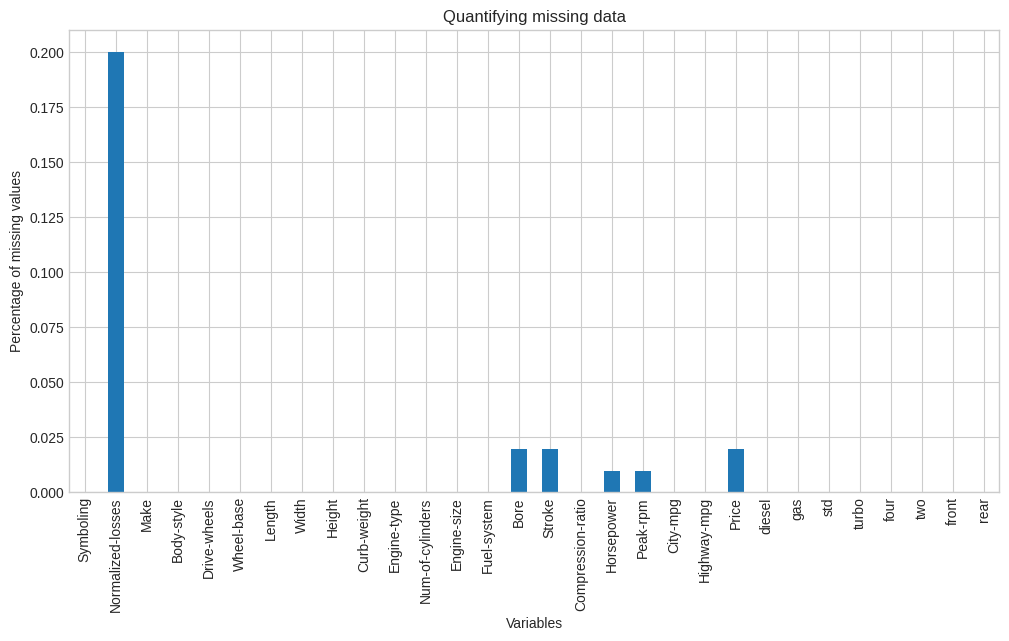

In [ ]:
variables = df_LE.columns.values

df_LE.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

df_SI = df_LE.copy()
df_II = df_LE.copy()

There are a few columns with missing values.<br>
Normalized-losses has the most, followed by bore, strike, price, and a few others.

In [ ]:
X = df_SI.iloc[:,0:29]
imputer = SimpleImputer(missing_values=np.nan, strategy='median', verbose=1)

transformed_values = imputer.fit_transform(X)
column = X.columns
print(column)
df_SI = pd.DataFrame(transformed_values, columns=column)
df_SI.describe()

Index(['Symboling', 'Normalized-losses', 'Make', 'Body-style', 'Drive-wheels',
       'Wheel-base', 'Length', 'Width', 'Height', 'Curb-weight', 'Engine-type',
       'Num-of-cylinders', 'Engine-size', 'Fuel-system', 'Bore', 'Stroke',
       'Compression-ratio', 'Horsepower', 'Peak-rpm', 'City-mpg',
       'Highway-mpg', 'Price', 'diesel', 'gas', 'std', 'turbo', 'four', 'two',
       'front'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:382: FutureWarning: The 'verbose' parameter was deprecated in version 1.1 and will be removed in 1.3. A warning will always be raised upon the removal of empty columns in the future version.
  warnings.warn(


,Symboling,Normalized-losses,Make,Body-style,Drive-wheels,Wheel-base,Length,Width,Height,Curb-weight,...,City-mpg,Highway-mpg,Price,diesel,gas,std,turbo,four,two,front
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,120.600000,12.195122,2.614634,1.326829,98.756585,174.049268,65.907805,53.724878,2555.565854,...,25.219512,30.751220,13150.307317,0.097561,0.902439,0.819512,0.180488,0.556098,0.434146,0.985366
std,1.245307,31.805105,6.274831,0.859081,0.556171,6.021776,12.337289,2.145204,2.443522,520.680204,...,6.542142,6.886443,7879.121326,0.297446,0.297446,0.385535,0.385535,0.498059,0.496858,0.120377
min,-2.000000,65.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,...,13.000000,16.000000,5118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.000000,8.000000,2.000000,1.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,...,19.000000,25.000000,7788.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,115.000000,12.000000,3.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,...,24.000000,30.000000,10295.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,2.000000,137.000000,19.000000,3.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,...,30.000000,34.000000,16500.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,3.000000,256.000000,21.000000,4.000000,2.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,...,49.000000,54.000000,45400.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


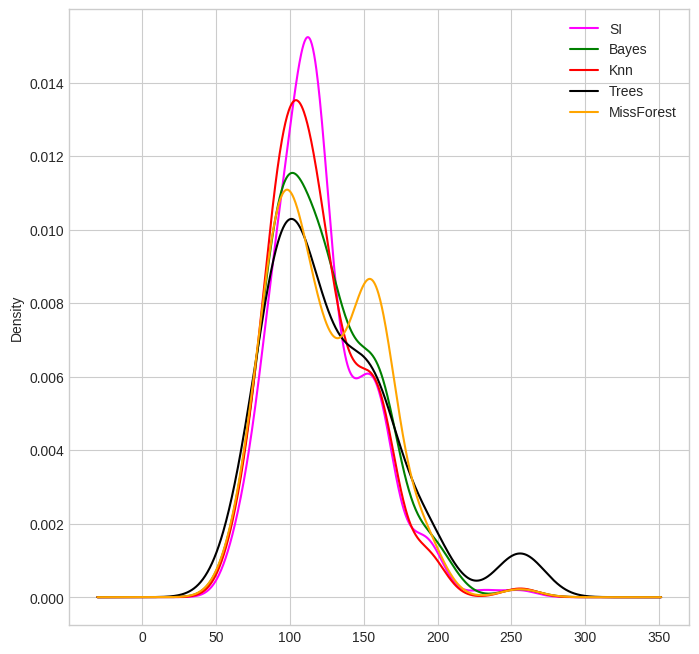

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_II.drop('City-mpg', axis=1), df_II['City-mpg'], test_size=0.3, random_state=0)

imputer_bayes = IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=0)
imputer_knn = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=5), max_iter=10, random_state=0)
imputer_nonLin = IterativeImputer(estimator=DecisionTreeRegressor(max_features='sqrt', random_state=0), max_iter=10, random_state=0)
imputer_missForest = IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=10, random_state=0), max_iter=10, random_state=0)

imputer_bayes.fit(X_train)
imputer_knn.fit(X_train)
imputer_nonLin.fit(X_train)
imputer_missForest.fit(X_train)

imputer_bayes.transform(X_train)
imputer_knn.transform(X_train)
imputer_nonLin.transform(X_train)
imputer_missForest.transform(X_train)

X_train_bayes = imputer_bayes.transform(X_train)
X_train_knn = imputer_knn.transform(X_train)
X_train_nonLin = imputer_nonLin.transform(X_train)
X_train_missForest = imputer_missForest.transform(X_train)

predictors = [var for var in variables if var != 'City-mpg']
X_train_bayes = pd.DataFrame(X_train_bayes, columns=predictors)
X_train_knn = pd.DataFrame(X_train_knn, columns=predictors)
X_train_nonLin = pd.DataFrame(X_train_nonLin, columns=predictors)
X_train_missForest = pd.DataFrame(X_train_missForest, columns=predictors)

fig = plt.figure()
ax = fig.add_subplot(111)

df_SI['Normalized-losses'].plot(kind='kde', ax=ax, color='magenta')
X_train_bayes['Normalized-losses'].plot(kind='kde', ax=ax, color='green')
X_train_knn['Normalized-losses'].plot(kind='kde', ax=ax, color='red')
X_train_nonLin['Normalized-losses'].plot(kind='kde', ax=ax, color='black')
X_train_missForest['Normalized-losses'].plot(kind='kde', ax=ax, color='orange')

lines, labels = ax.get_legend_handles_labels()
labels = ['SI', 'Bayes', 'Knn', 'Trees', 'MissForest']
ax.legend(lines, labels, loc='best')
fig.set_size_inches(8,8)
plt.show()

While all five imputers give similar kde's, the si goes the highest, and the missforest and trees have extra rises.

In [ ]:
df_B1 = X_train_bayes
df_B2 = X_train_bayes
df_B2['City-mpg'] = df_LE['City-mpg']
df_B2.head()

,Symboling,Normalized-losses,Make,Body-style,Drive-wheels,Wheel-base,Length,Width,Height,Curb-weight,...,Price,diesel,gas,std,turbo,four,two,front,rear,City-mpg
0,0.0,85.0,5.0,3.0,1.0,96.5,175.4,62.5,54.1,2372.0,...,10295.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,21
1,0.0,115.0,8.0,3.0,1.0,98.8,177.8,66.5,55.5,2410.0,...,8495.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,21
2,3.0,150.0,8.0,2.0,2.0,95.3,169.0,65.7,49.6,2380.0,...,11845.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,19
3,0.0,128.0,12.0,3.0,1.0,100.4,181.7,66.5,55.1,3095.0,...,13499.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,24
4,1.0,125.0,11.0,3.0,1.0,96.3,172.4,65.4,51.6,2405.0,...,8189.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,18


In [ ]:
corrMatrix = df_B2.corr()
corrMatrix

,Symboling,Normalized-losses,Make,Body-style,Drive-wheels,Wheel-base,Length,Width,Height,Curb-weight,...,Price,diesel,gas,std,turbo,four,two,front,rear,City-mpg
Symboling,1.000000,0.556163,-0.175171,-0.610109,-0.034550,-0.574445,-0.405901,-0.301538,-0.592004,-0.253986,...,-0.063348,-0.192399,0.192399,0.065218,-0.065218,-0.688620,0.687594,-0.267908,0.267908,0.041046
Normalized-losses,0.556163,1.000000,-0.344329,-0.360408,0.332983,-0.110634,-0.008988,0.008191,-0.429044,0.091608,...,0.116008,-0.141881,0.141881,-0.039678,0.039678,-0.405529,0.396241,0.012537,-0.012537,0.063887
Make,-0.175171,-0.344329,1.000000,0.124333,-0.023445,0.113724,0.118789,0.035234,0.251615,0.013667,...,-0.136298,0.183469,-0.183469,-0.054059,0.054059,0.175019,-0.156834,-0.067585,0.067585,0.059359
Body-style,-0.610109,-0.360408,0.124333,1.000000,-0.131766,0.445109,0.350081,0.159786,0.617428,0.140756,...,-0.104158,0.154273,-0.154273,-0.073873,0.073873,0.702085,-0.710439,0.325583,-0.325583,-0.026763
Drive-wheels,-0.034550,0.332983,-0.023445,-0.131766,1.000000,0.468787,0.533845,0.494556,0.044874,0.592001,...,0.615712,0.155472,-0.155472,-0.148039,0.148039,-0.026916,0.036374,-0.172123,0.172123,0.038636
Wheel-base,-0.574445,-0.110634,0.113724,0.445109,0.468787,1.000000,0.877786,0.824589,0.615733,0.765338,...,0.536890,0.369373,-0.369373,-0.298482,0.298482,0.504708,-0.494162,0.222934,-0.222934,0.066156
Length,-0.405901,-0.008988,0.118789,0.350081,0.533845,0.877786,1.000000,0.858950,0.508630,0.874730,...,0.669144,0.279788,-0.279788,-0.243950,0.243950,0.478684,-0.459672,0.068316,-0.068316,0.091873
Width,-0.301538,0.008191,0.035234,0.159786,0.494556,0.824589,0.858950,1.000000,0.325000,0.866753,...,0.735534,0.338223,-0.338223,-0.364495,0.364495,0.280849,-0.267222,0.062808,-0.062808,0.053517
Height,-0.592004,-0.429044,0.251615,0.617428,0.044874,0.615733,0.508630,0.325000,1.000000,0.318882,...,0.099970,0.320886,-0.320886,-0.083283,0.083283,0.596299,-0.579884,0.129052,-0.129052,0.098614
Curb-weight,-0.253986,0.091608,0.013667,0.140756,0.592001,0.765338,0.874730,0.866753,0.318882,1.000000,...,0.827947,0.286460,-0.286460,-0.356212,0.356212,0.242281,-0.232520,-0.053466,0.053466,0.033785


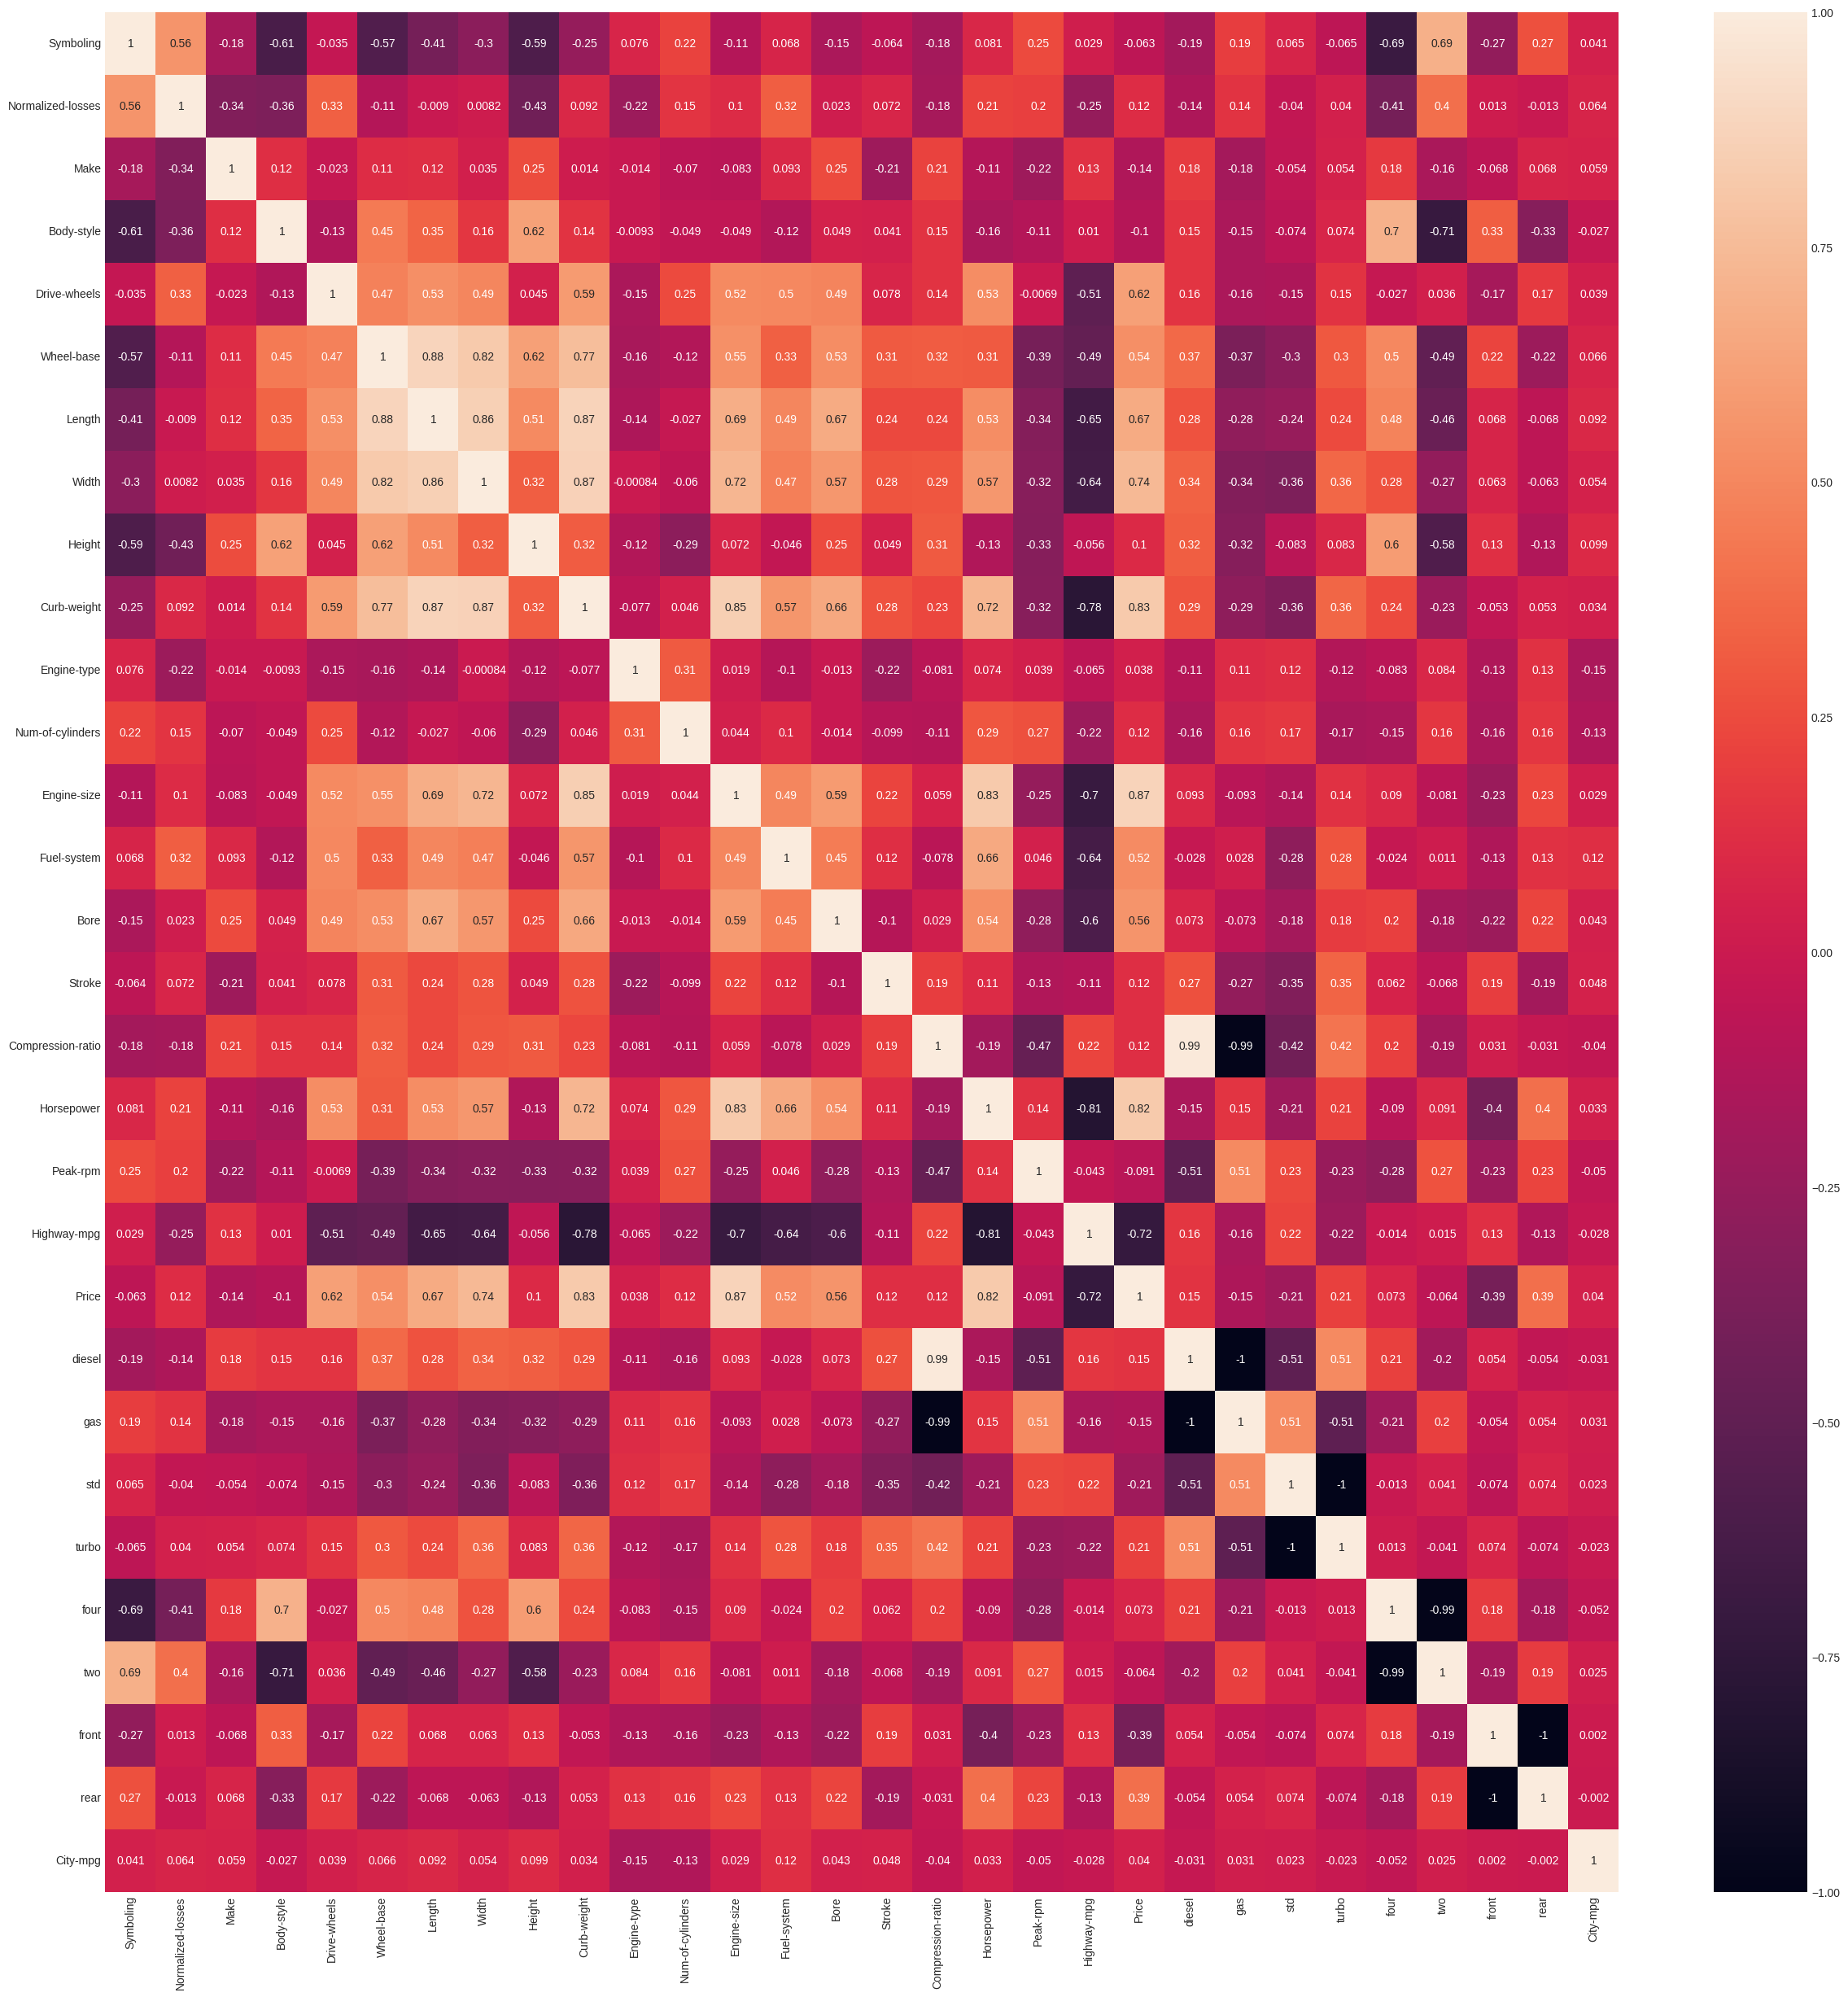

In [ ]:
plt.rcParams.update({'font.size':10, 'figure.figsize':(30,30)})
f3 = sns.heatmap(corrMatrix, annot=True)
plt.show()

For example, gas has a high correlation with normalized losses and compression ration, so maybe they might be redundant and we can get rid of one.

In [ ]:
df_B2.std()

Symboling               1.253853
Normalized-losses      34.676238
Make                    6.247103
Body-style              0.885552
Drive-wheels            0.549079
Wheel-base              6.258976
Length                 12.052101
Width                   2.064090
Height                  2.525753
Curb-weight           528.853951
Engine-type             1.074585
Num-of-cylinders        0.781004
Engine-size            42.208568
Fuel-system             2.018603
Bore                    0.265945
Stroke                  0.287835
Compression-ratio       4.324095
Horsepower             38.091067
Peak-rpm              509.421962
Highway-mpg             6.387292
Price                7936.962219
diesel                  0.324786
gas                     0.324786
std                     0.403496
turbo                   0.403496
four                    0.489826
two                     0.488214
front                   0.143818
rear                    0.143818
City-mpg                7.013024
dtype: flo

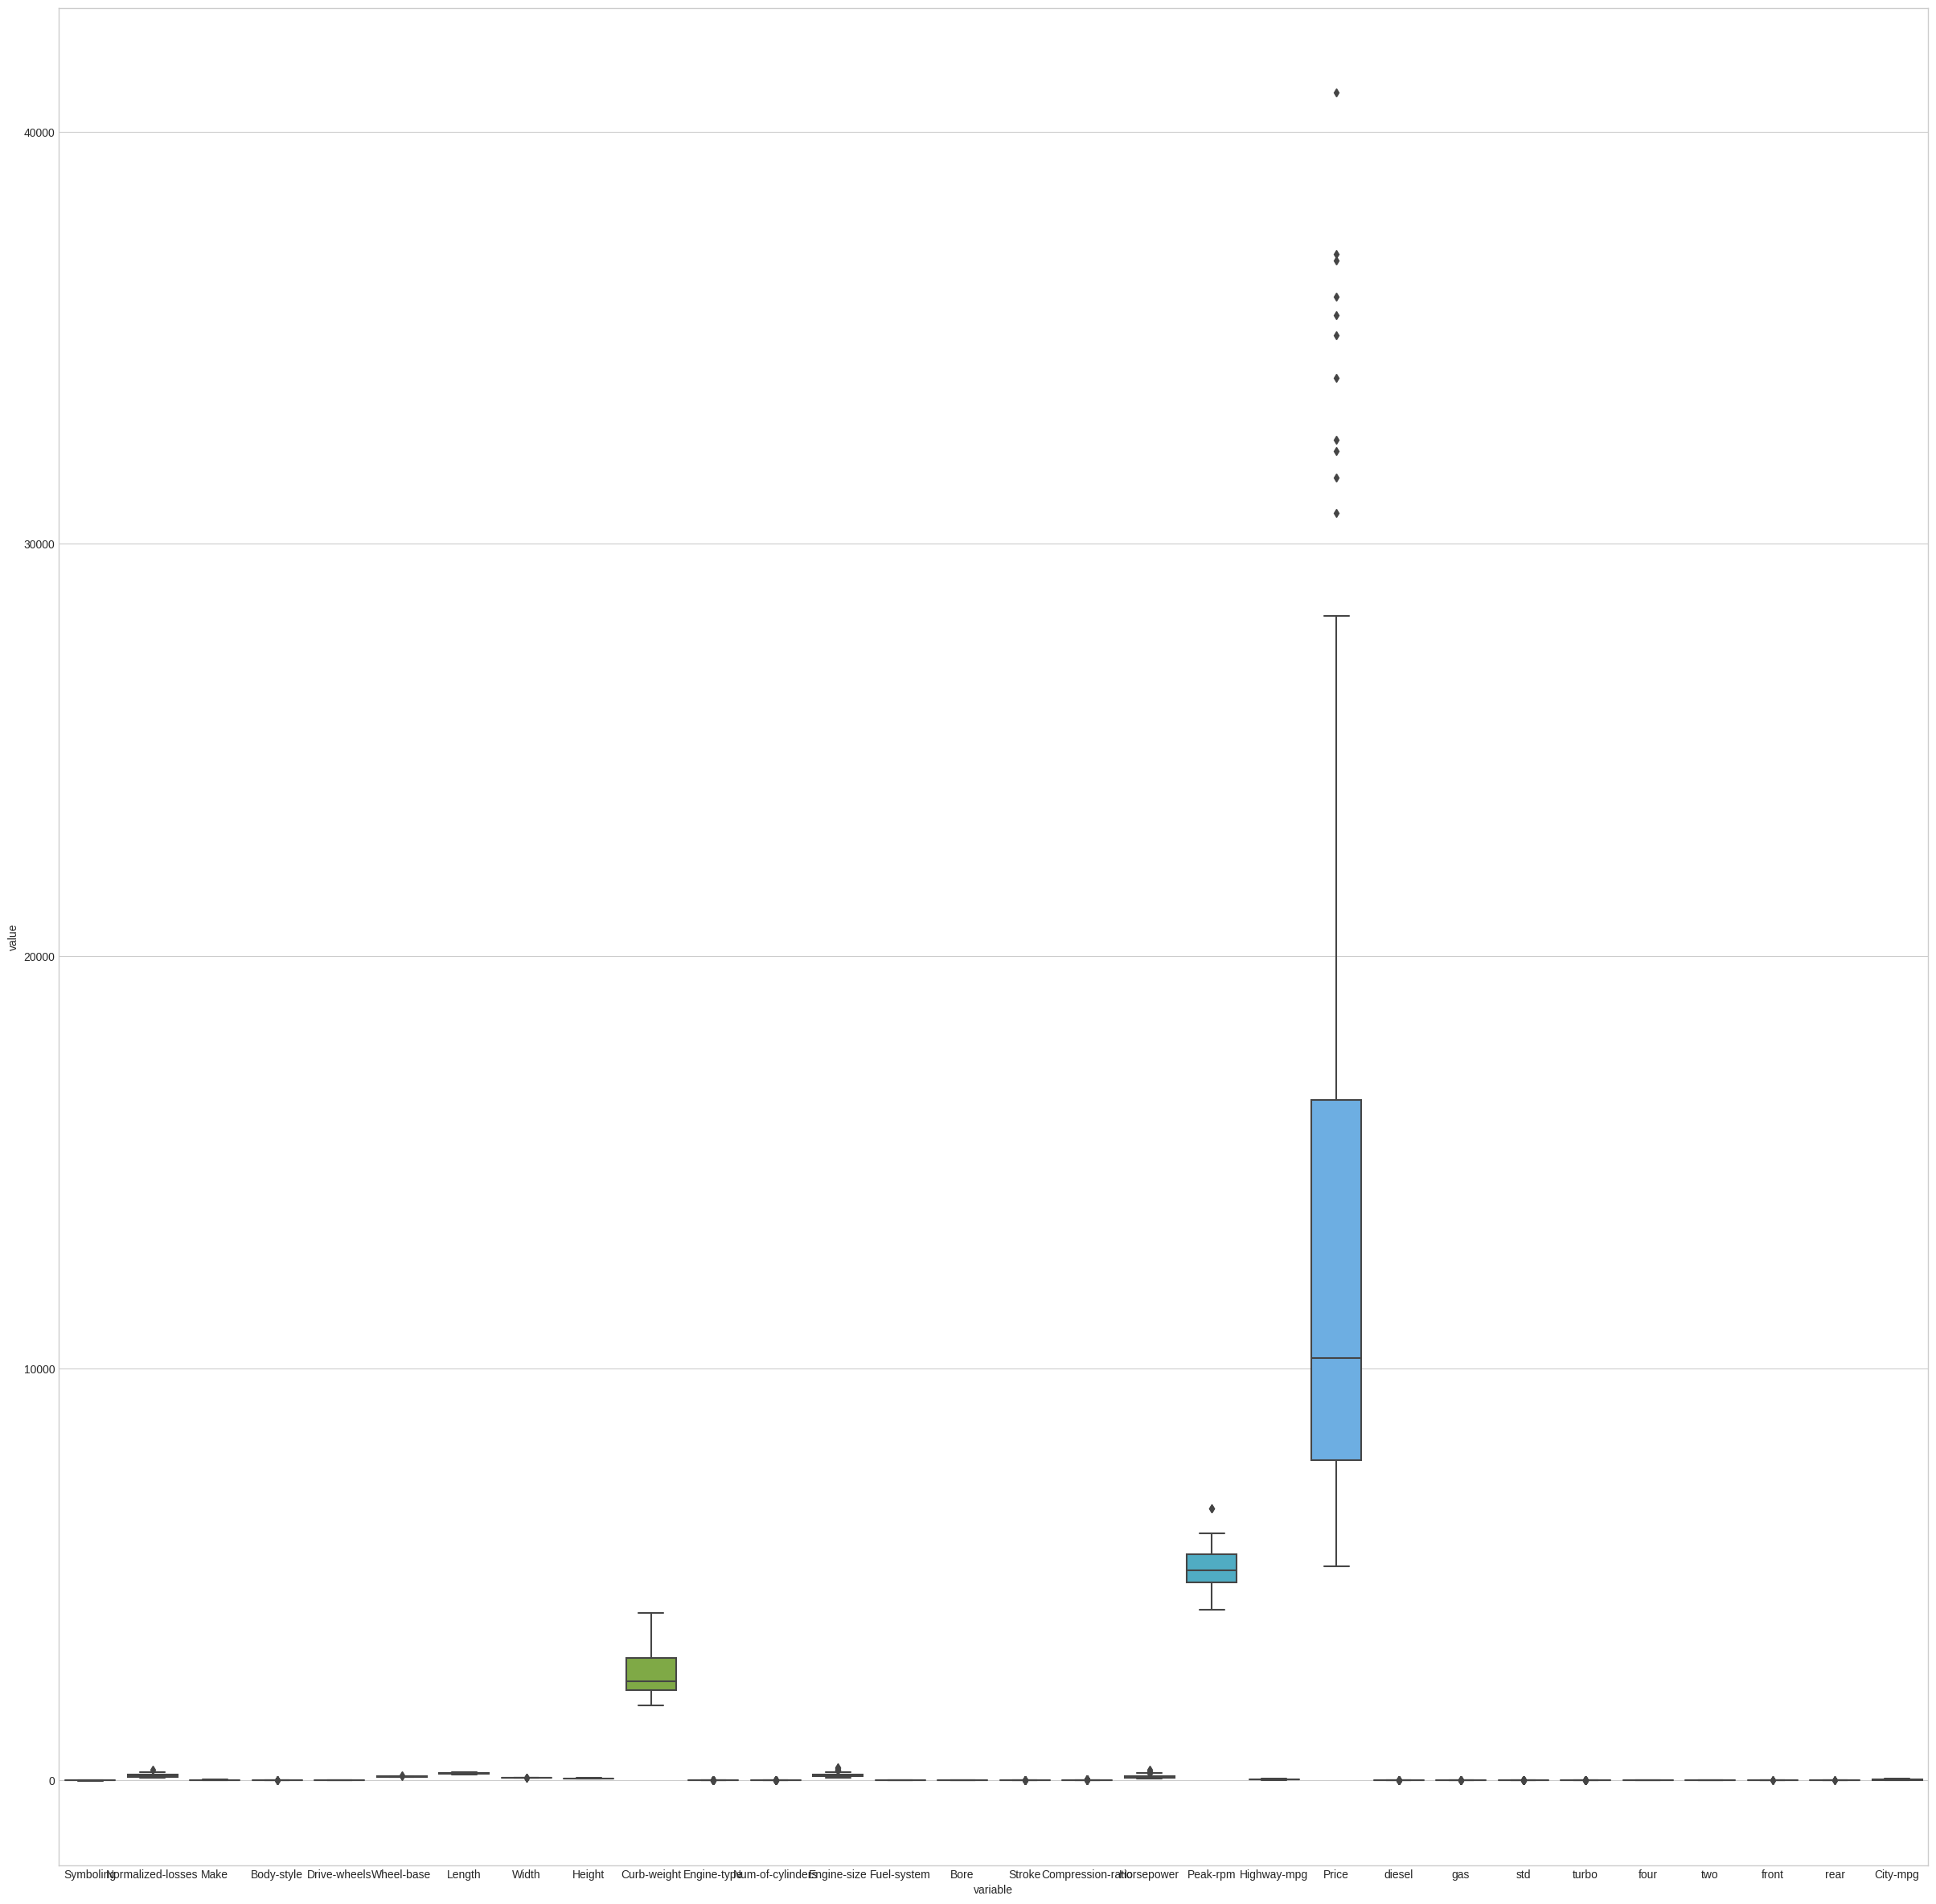

In [ ]:
sns.boxplot(x='variable', y='value', data=pd.melt(df_B2))

plt.show()

Of all the columns, price has the biggest variation; additionally it has a lot of outliers<br>After price, curb-weight and peak-rpm have the biggest variation.

In [ ]:
n_df_B2 = (df_B2-df_B2.mean())/df_B2.std()
n_df_B2.head()

,Symboling,Normalized-losses,Make,Body-style,Drive-wheels,Wheel-base,Length,Width,Height,Curb-weight,...,Price,diesel,gas,std,turbo,four,two,front,rear,City-mpg
0,-0.568876,-1.080085,-1.140669,0.418529,-0.649531,-0.399203,0.074270,-1.638745,0.111301,-0.389865,...,-0.380198,-0.366029,0.366029,0.5026,-0.5026,0.799485,-0.787800,0.145872,-0.145872,-0.536464
1,-0.568876,-0.214940,-0.660446,0.418529,-0.649531,-0.031731,0.273405,0.299155,0.665591,-0.318012,...,-0.606985,-0.366029,0.366029,0.5026,-0.5026,0.799485,-0.787800,0.145872,-0.145872,-0.536464
2,1.823750,0.794397,-0.660446,-0.710710,1.171702,-0.590928,-0.456758,-0.088425,-1.670346,-0.374738,...,-0.184909,-0.366029,0.366029,0.5026,-0.5026,-1.242058,1.260481,0.145872,-0.145872,-0.821648
3,-0.568876,0.159957,-0.020149,0.418529,-0.649531,0.223902,0.597000,0.299155,0.507222,0.977242,...,0.023483,-0.366029,0.366029,0.5026,-0.5026,0.799485,-0.787800,0.145872,-0.145872,-0.108689
4,0.228666,0.073442,-0.180223,0.418529,-0.649531,-0.431157,-0.174650,-0.233768,-0.878503,-0.327466,...,-0.645539,-0.366029,0.366029,0.5026,-0.5026,0.799485,-0.787800,0.145872,-0.145872,-0.964240


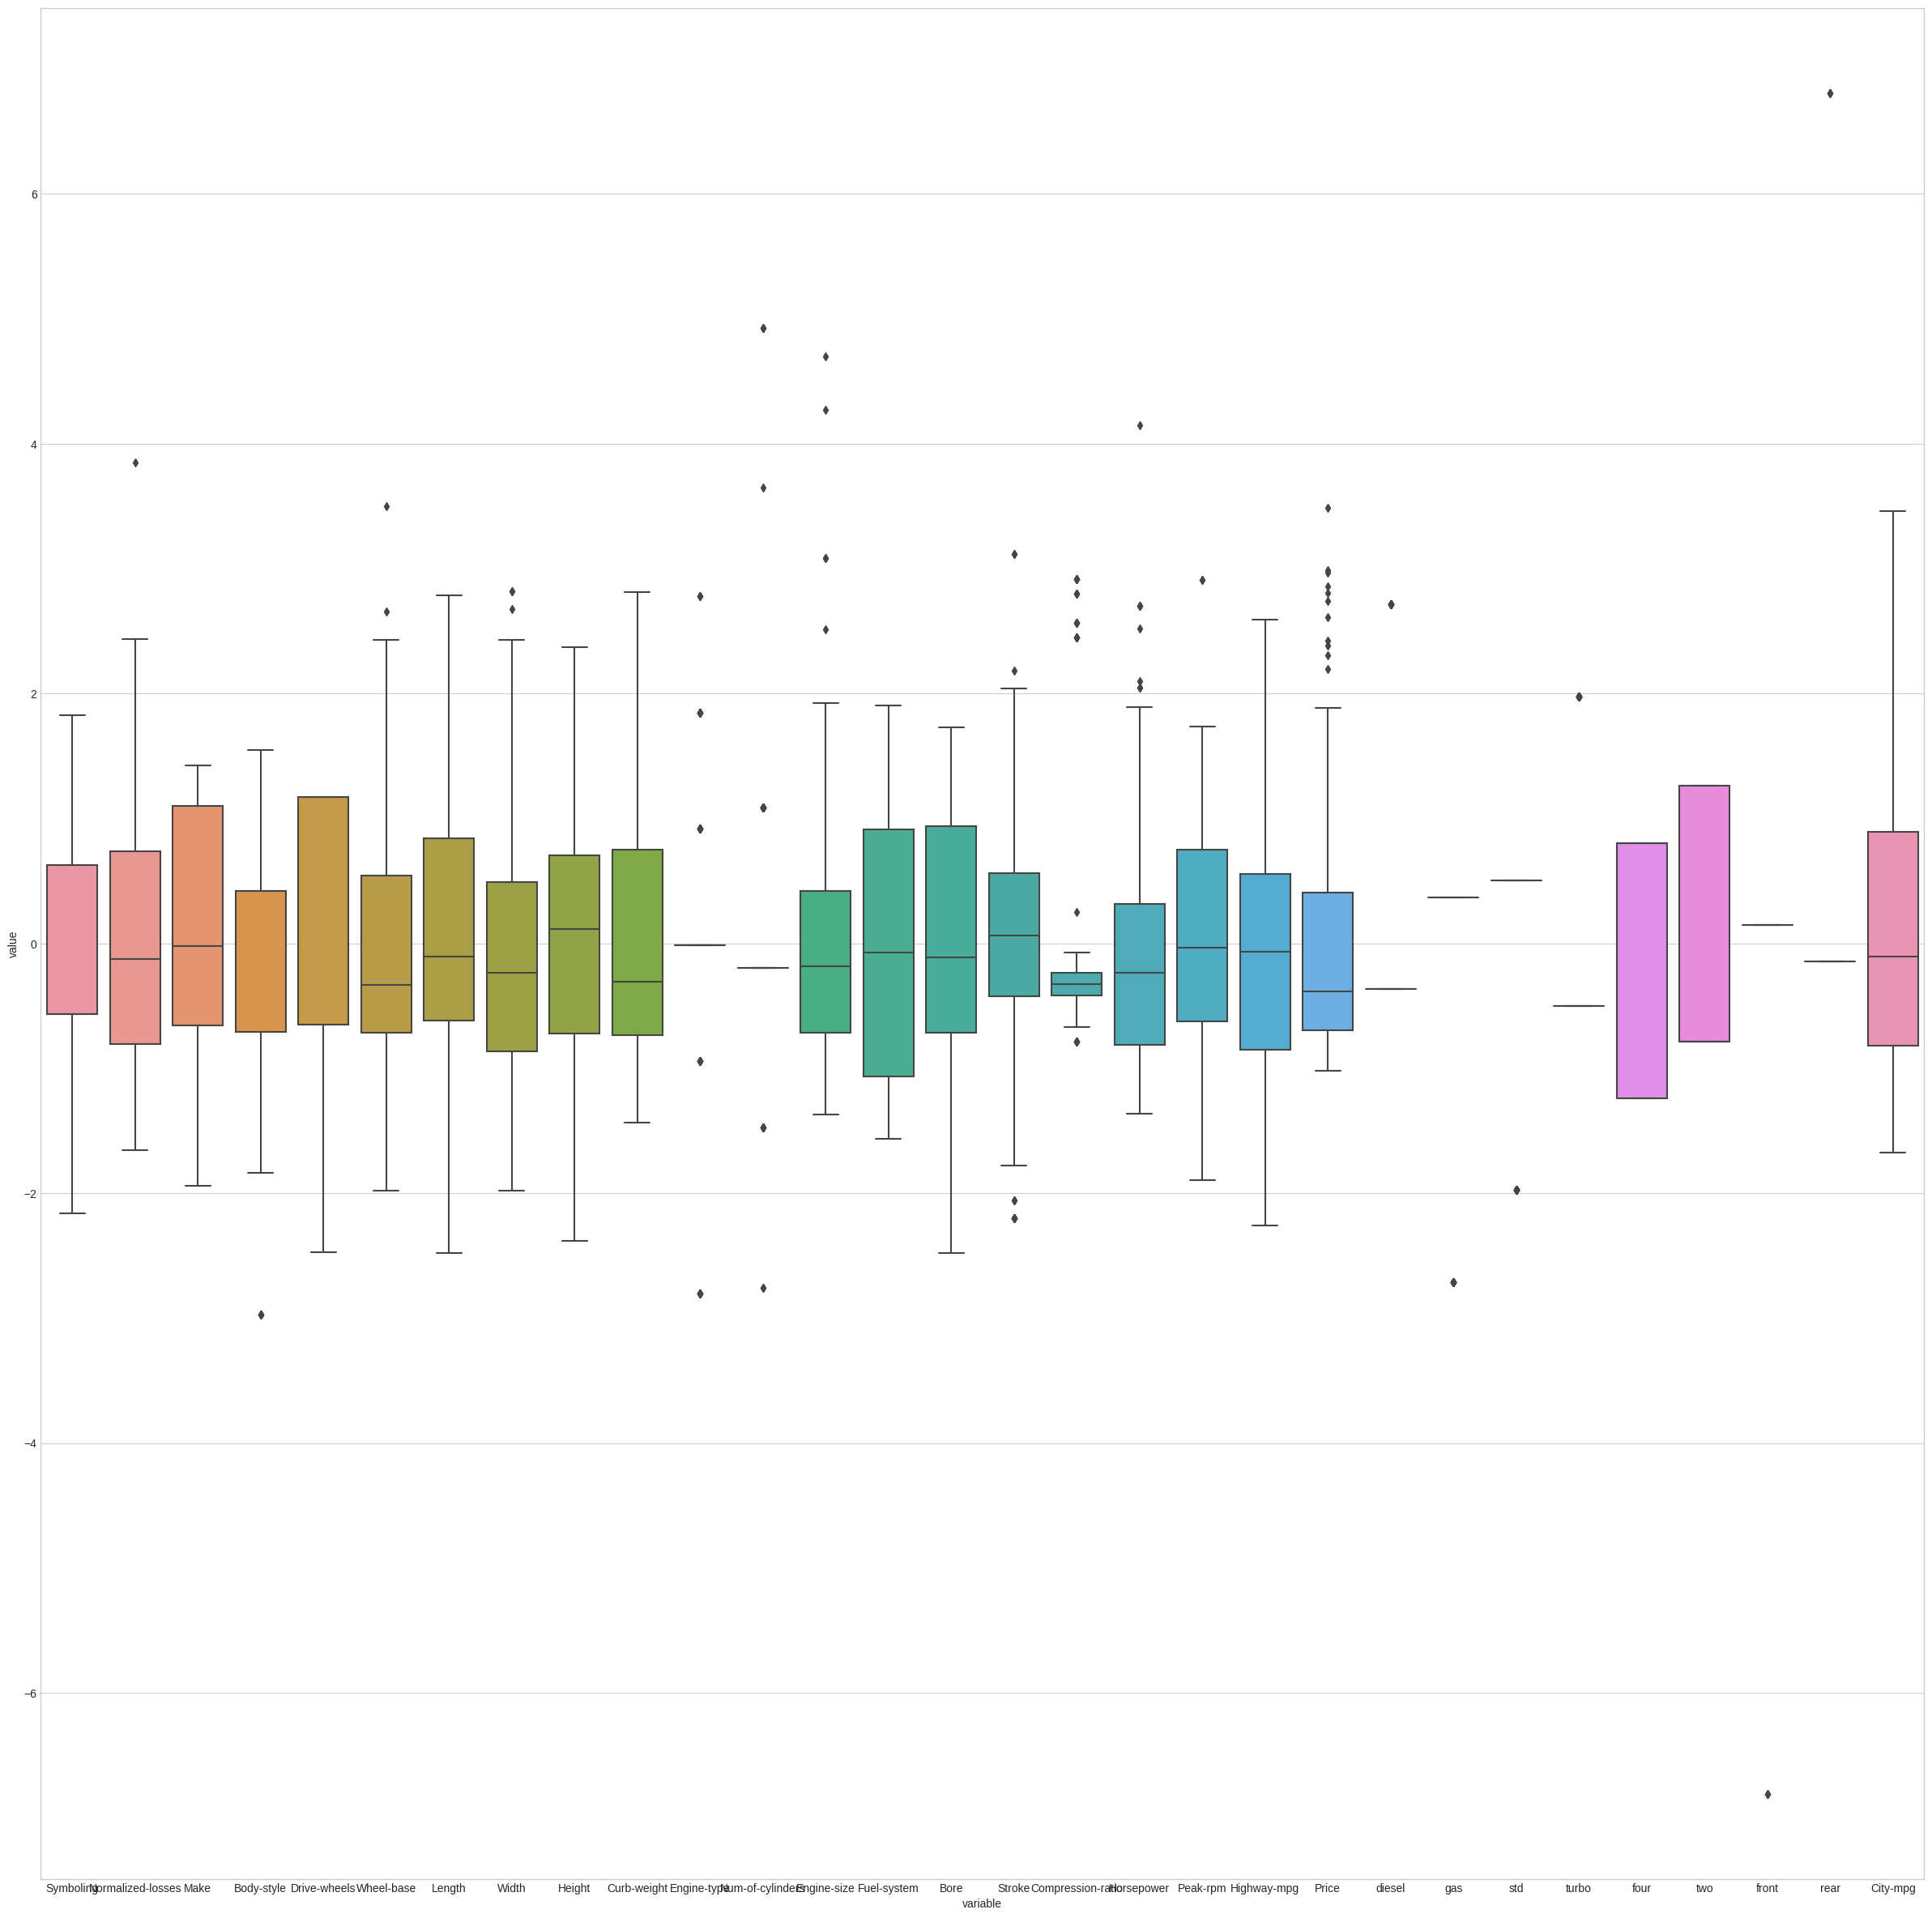

In [ ]:
sns.boxplot(x='variable', y='value', data=pd.melt(n_df_B2))

plt.show()

Once the data is normalized, we can see that the data does not have low variation after all

In [ ]:
n_df_B2.describe().T

,count,mean,std,min,25%,50%,75%,max
Symboling,143.0,-2.329139e-17,1.0,-2.163960,-0.568876,-0.568876,0.627437,1.823750
Normalized-losses,143.0,-3.975064e-16,1.0,-1.656849,-0.806123,-0.128425,0.736721,3.851245
Make,143.0,-1.366428e-16,1.0,-1.941040,-0.660446,-0.020149,1.100370,1.420519
Body-style,143.0,2.360194e-16,1.0,-2.969189,-0.710710,0.418529,0.418529,1.547769
Drive-wheels,143.0,-2.794967e-17,1.0,-2.470764,-0.649531,-0.649531,1.171702,1.171702
Wheel-base,143.0,7.189276e-16,1.0,-1.980931,-0.718744,-0.335295,0.543443,3.499198
Length,143.0,-1.751513e-15,1.0,-2.481301,-0.618556,-0.108271,0.837622,2.787489
Width,143.0,-9.875550e-16,1.0,-1.977878,-0.863585,-0.233768,0.492945,2.818425
Height,143.0,-1.515493e-15,1.0,-2.383004,-0.720134,0.111301,0.705183,2.368053
Curb-weight,143.0,3.307378e-16,1.0,-1.435523,-0.733060,-0.310448,0.751281,2.813287


<ipython-input-62-a4acf05d7552>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


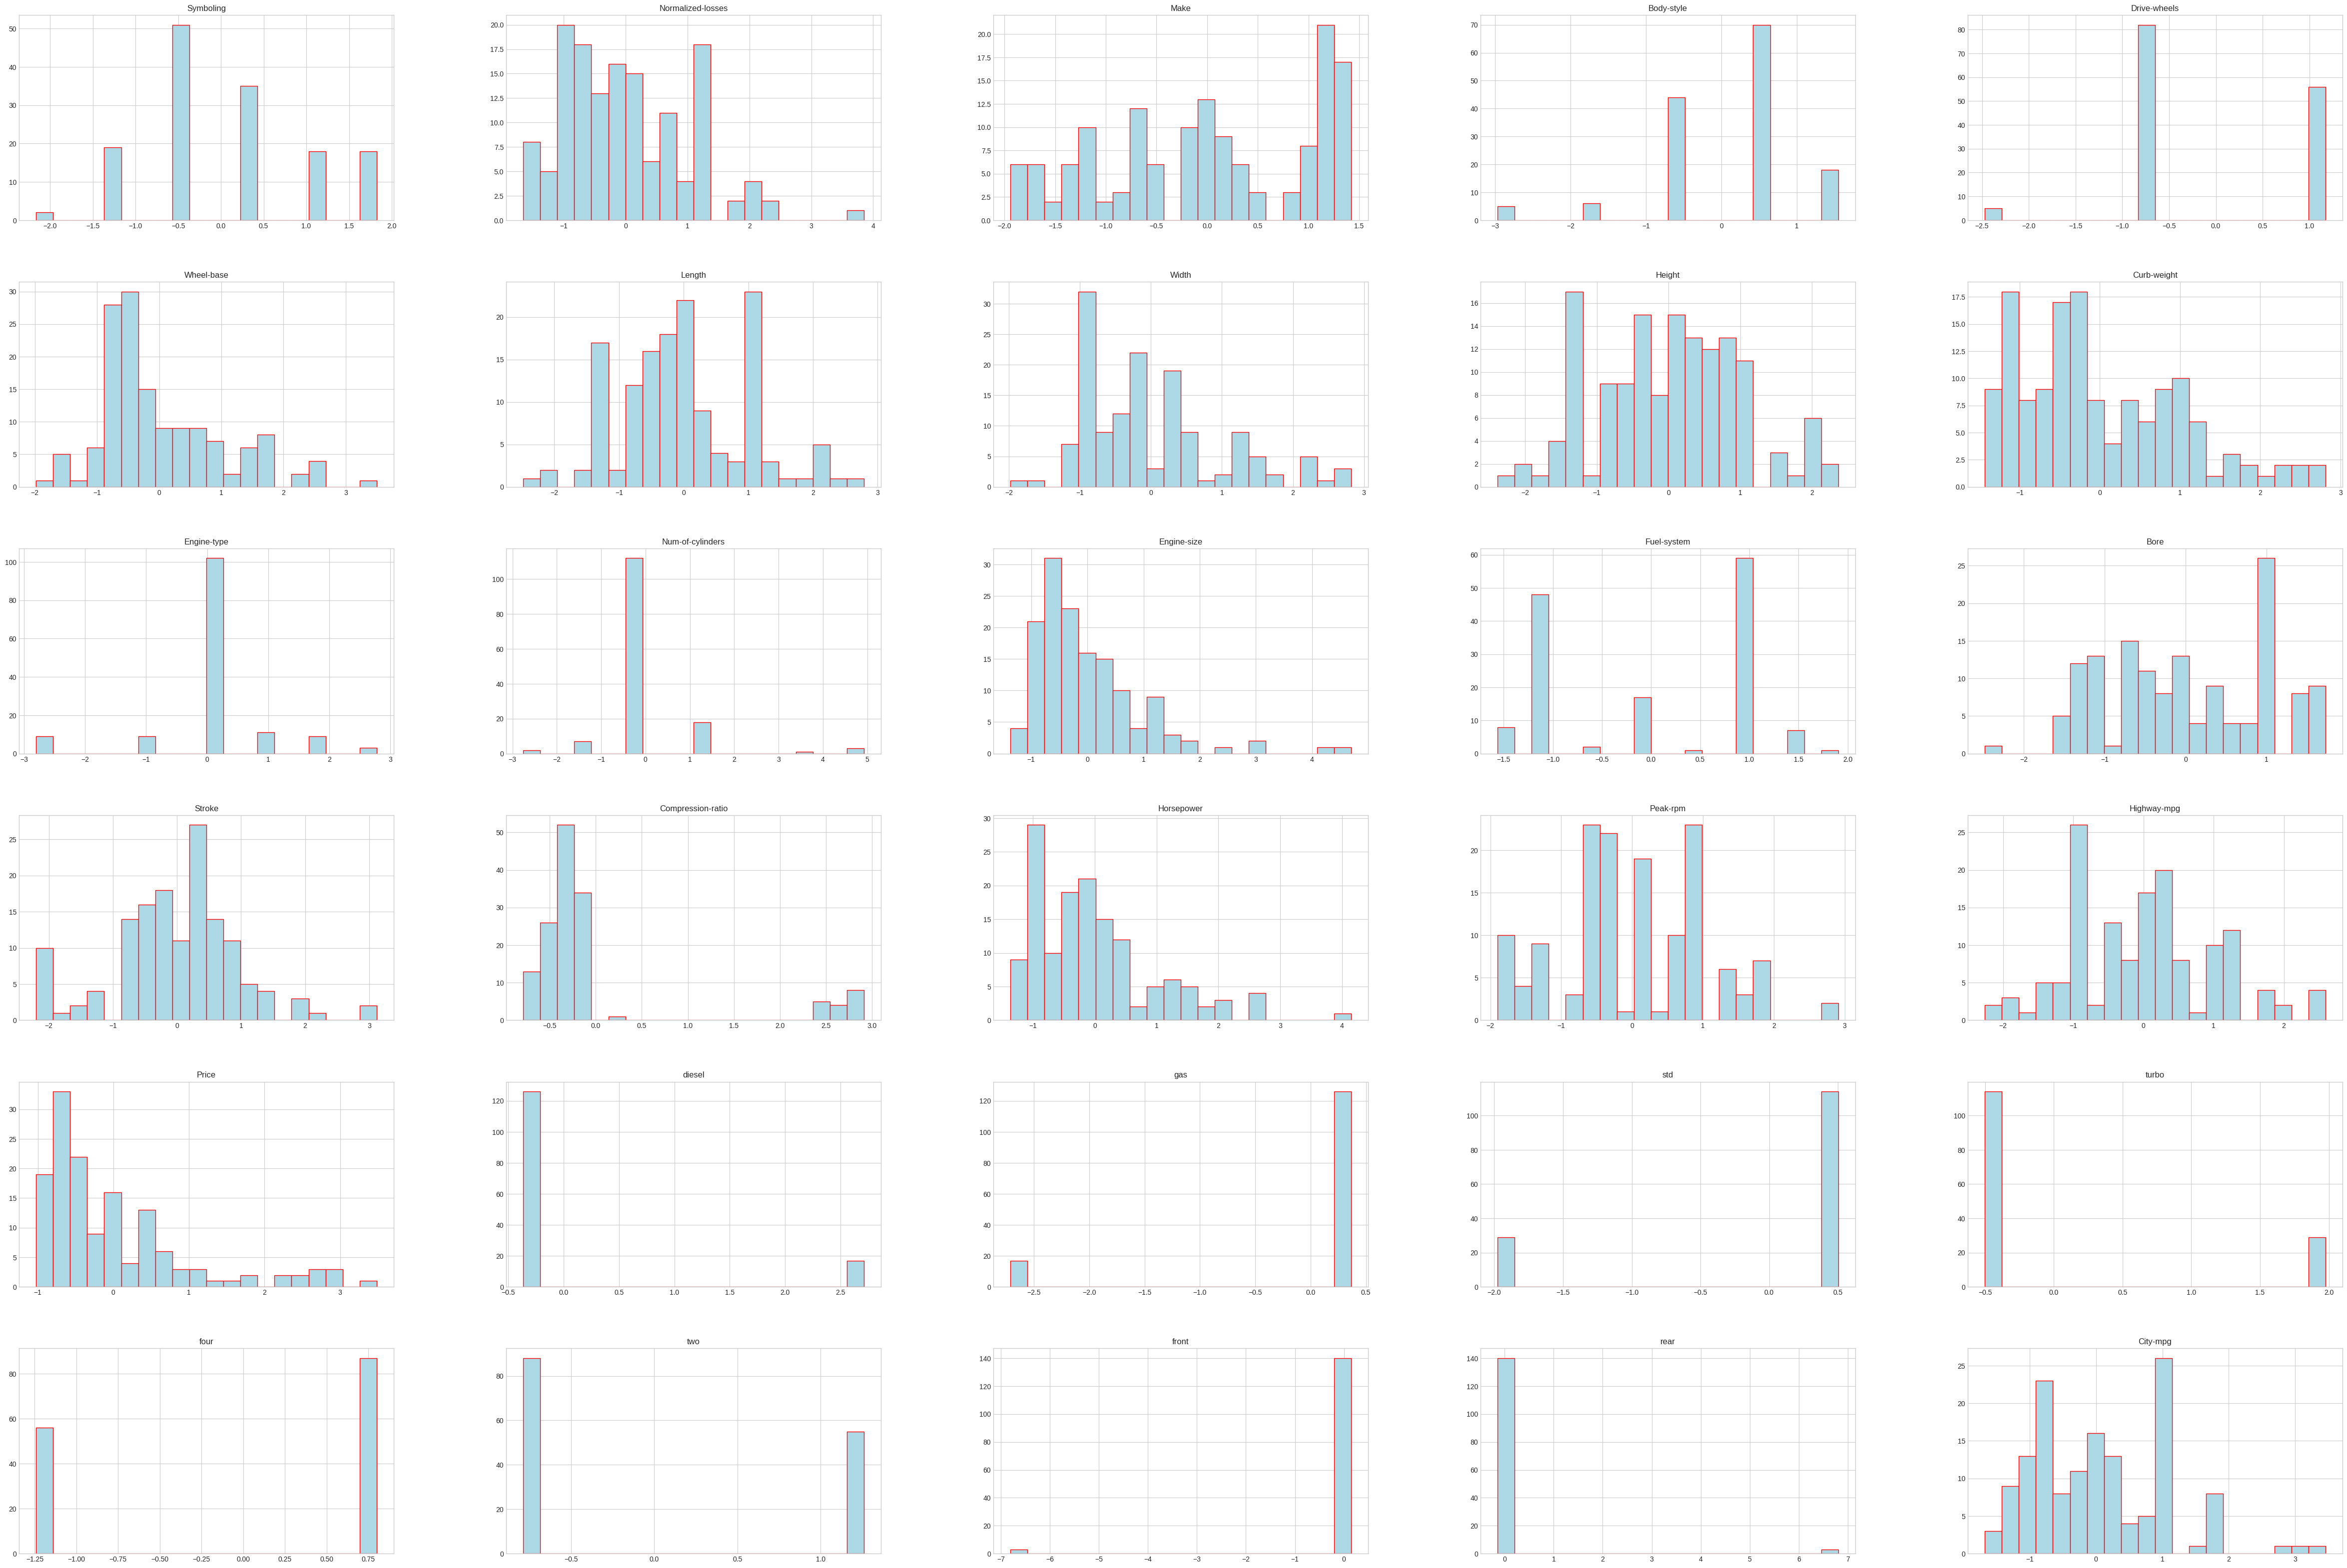

In [ ]:
plt.style.use('seaborn-whitegrid')
n_df_B2.hist(bins=20, figsize=(60,40), color='lightblue', edgecolor='red')

plt.show()

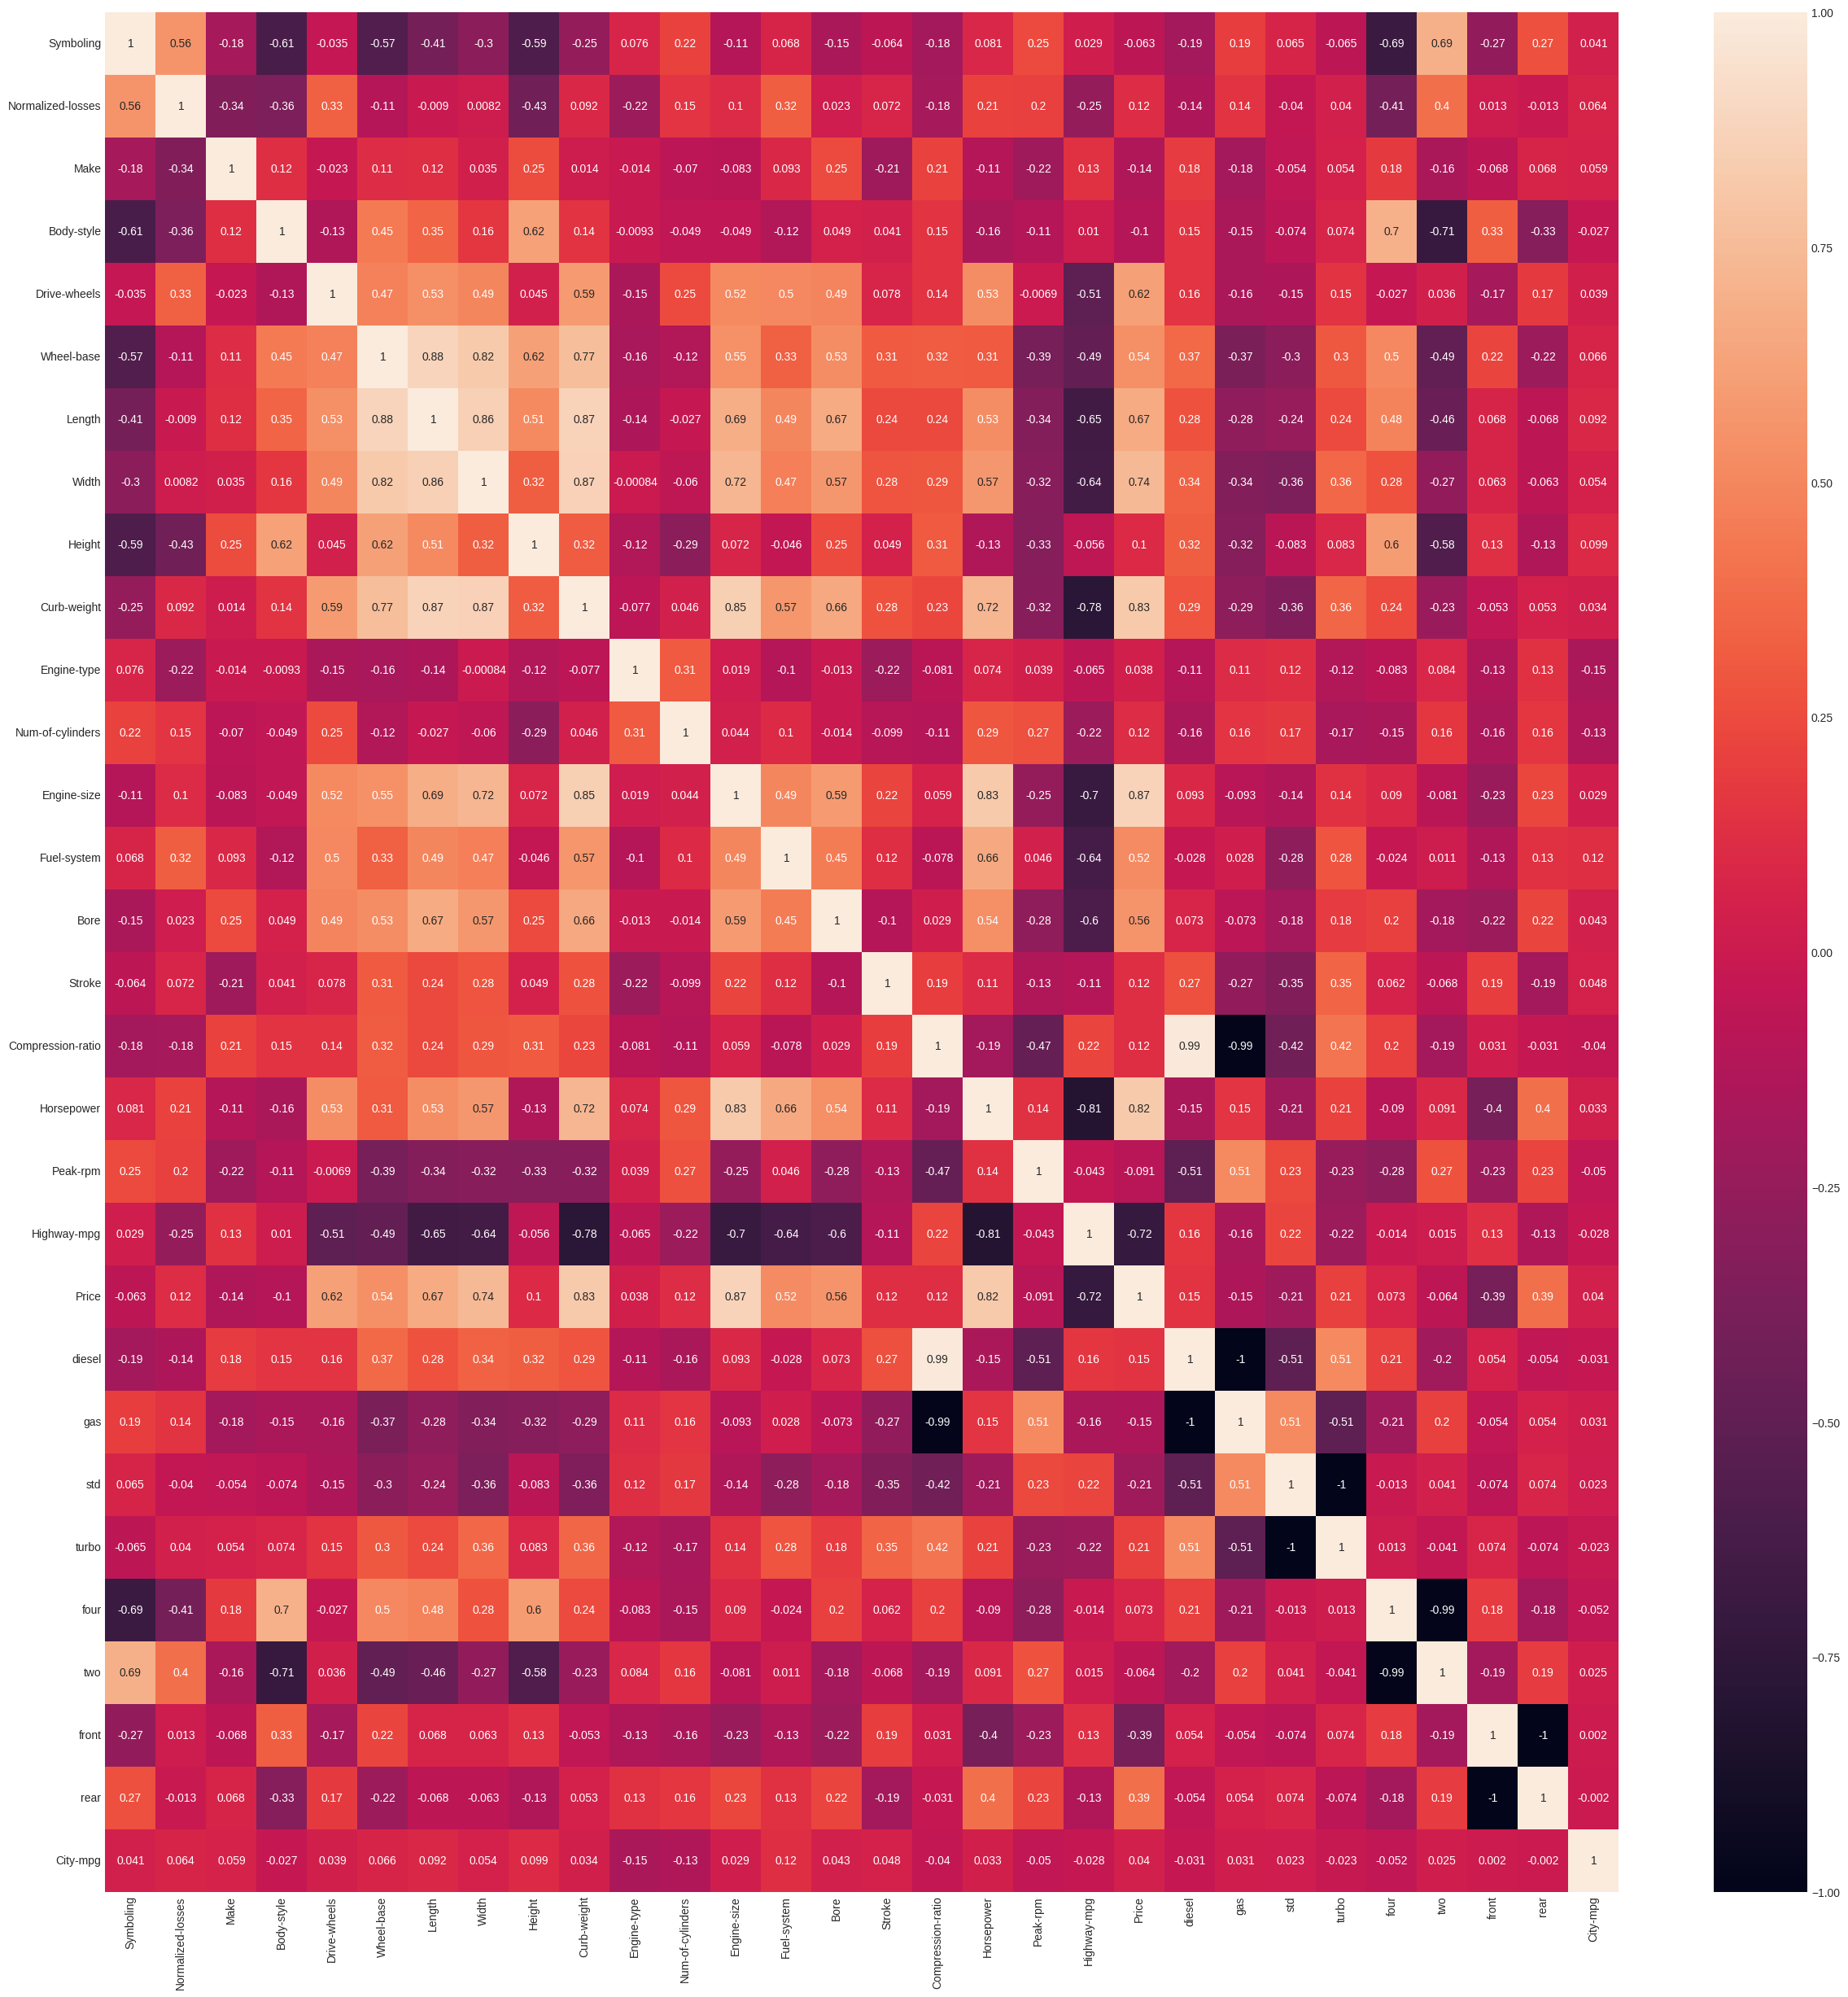

In [ ]:
corrMatrix = n_df_B2.corr()

plt.rcParams.update({'font.size': 10, 'figure.figsize':(30,30)})
f3 = sns.heatmap(corrMatrix, annot=True)

plt.show()

As expected, the corelation maatrix doesn't change after being normailzed

In [ ]:
n_df_B2 = n_df_B2.drop(['Length', 'Width', 'Engine-size', 'diesel'], axis=1)
n_df_B2.head()

,Symboling,Normalized-losses,Make,Body-style,Drive-wheels,Wheel-base,Height,Curb-weight,Engine-type,Num-of-cylinders,...,Highway-mpg,Price,gas,std,turbo,four,two,front,rear,City-mpg
0,-0.568876,-1.080085,-1.140669,0.418529,-0.649531,-0.399203,0.111301,-0.389865,-0.013015,-0.196985,...,0.400708,-0.380198,0.366029,0.5026,-0.5026,0.799485,-0.787800,0.145872,-0.145872,-0.536464
1,-0.568876,-0.214940,-0.660446,0.418529,-0.649531,-0.031731,0.665591,-0.318012,-0.013015,-0.196985,...,0.244147,-0.606985,0.366029,0.5026,-0.5026,0.799485,-0.787800,0.145872,-0.145872,-0.536464
2,1.823750,0.794397,-0.660446,-0.710710,1.171702,-0.590928,-1.670346,-0.374738,2.778761,4.924627,...,-1.164900,-0.184909,0.366029,0.5026,-0.5026,-1.242058,1.260481,0.145872,-0.145872,-0.821648
3,-0.568876,0.159957,-0.020149,0.418529,-0.649531,0.223902,0.507222,0.977242,1.848169,1.083418,...,-1.321461,0.023483,0.366029,0.5026,-0.5026,0.799485,-0.787800,0.145872,-0.145872,-0.108689
4,0.228666,0.073442,-0.180223,0.418529,-0.649531,-0.431157,-0.878503,-0.327466,-0.013015,-0.196985,...,0.244147,-0.645539,0.366029,0.5026,-0.5026,0.799485,-0.787800,0.145872,-0.145872,-0.964240


In [ ]:
midstep = n_df_B2.copy()
S = midstep.drop(['City-mpg'], axis=1)
t = n_df_B2['City-mpg']

S_train, S_test, t_train, t_test = model_selection.train_test_split(S, t, test_size=.3, random_state=42)

sS = preprocessing.StandardScaler().fit_transform(S)
sS_train, sS_test, st_train, st_test = model_selection.train_test_split(sS, t, test_size=.3, random_state=42)

dummy = DummyRegressor()
dummy.fit(S_train,t_train)
prePCAscore = dummy.score(S_test, t_test)
print(prePCAscore)

-0.0037513700929481253


In [ ]:
pca = PCA(random_state=42)
X_pca = pca.fit_transform(StandardScaler().fit_transform(n_df_B2))

pca.explained_variance_ratio_

array([2.35496081e-01, 1.98309341e-01, 1.09161338e-01, 8.43962776e-02,
       5.46877741e-02, 4.72502866e-02, 4.56216917e-02, 3.71317392e-02,
       3.39772688e-02, 2.66749624e-02, 2.48376373e-02, 1.90539616e-02,
       1.78834206e-02, 1.47045860e-02, 1.13800172e-02, 9.38476821e-03,
       8.63456336e-03, 7.52568842e-03, 5.20347054e-03, 4.37174232e-03,
       1.99075443e-03, 1.68061041e-03, 4.78575560e-04, 1.63443525e-04,
       1.07063135e-33, 1.07063135e-33])

In [ ]:
pca.components_[0]

array([-0.21107755, -0.05247783,  0.06813599,  0.16321173,  0.21026655,
        0.35856312,  0.22909199,  0.35333197, -0.06077992, -0.04370503,
        0.19589601,  0.25971611,  0.12100505,  0.17241161,  0.19700001,
       -0.1780062 , -0.23424374,  0.26787758, -0.19873721, -0.20570986,
        0.20570986,  0.21669889, -0.21534007,  0.01615452, -0.01615452,
        0.0200148 ])

[Text(0.5, 0, 'Component'),
 Text(0, 0.5, 'Percent of explained variance'),
 Text(0.5, 1.0, 'Scree Plot'),
 (0.0, 1.0)]

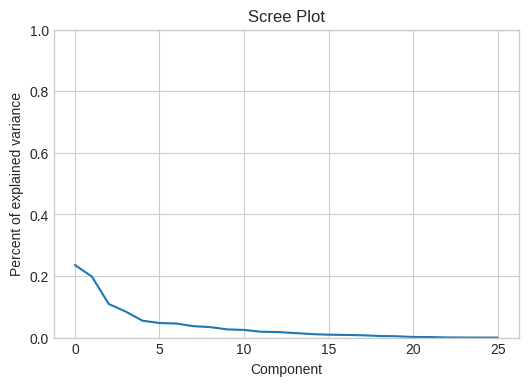

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(pca.explained_variance_ratio_)
ax.set(xlabel='Component', ylabel='Percent of explained variance', title='Scree Plot', ylim=(0,1))

We see that it takes 20 components to fully explain the data, but already at 10 we are not too far off.

[Text(0.5, 0, 'Component'),
 Text(0, 0.5, 'Percent of Explained Variance'),
 Text(0.5, 1.0, 'Cumulative Variance'),
 (0.0, 1.0)]

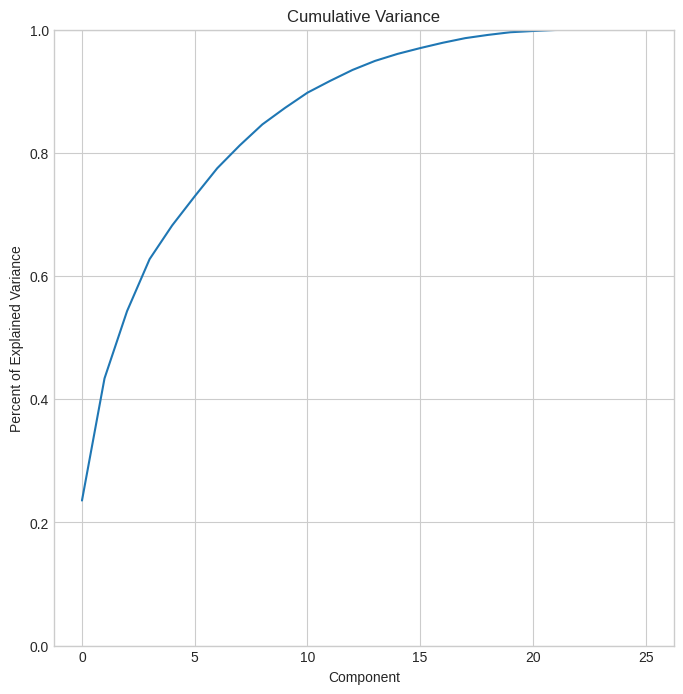

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.set(xlabel='Component', ylabel='Percent of Explained Variance', title='Cumulative Variance', ylim=(0,1))

Similar to the last graph, we see that the data is well-explained after 10 components.

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kwargs)>

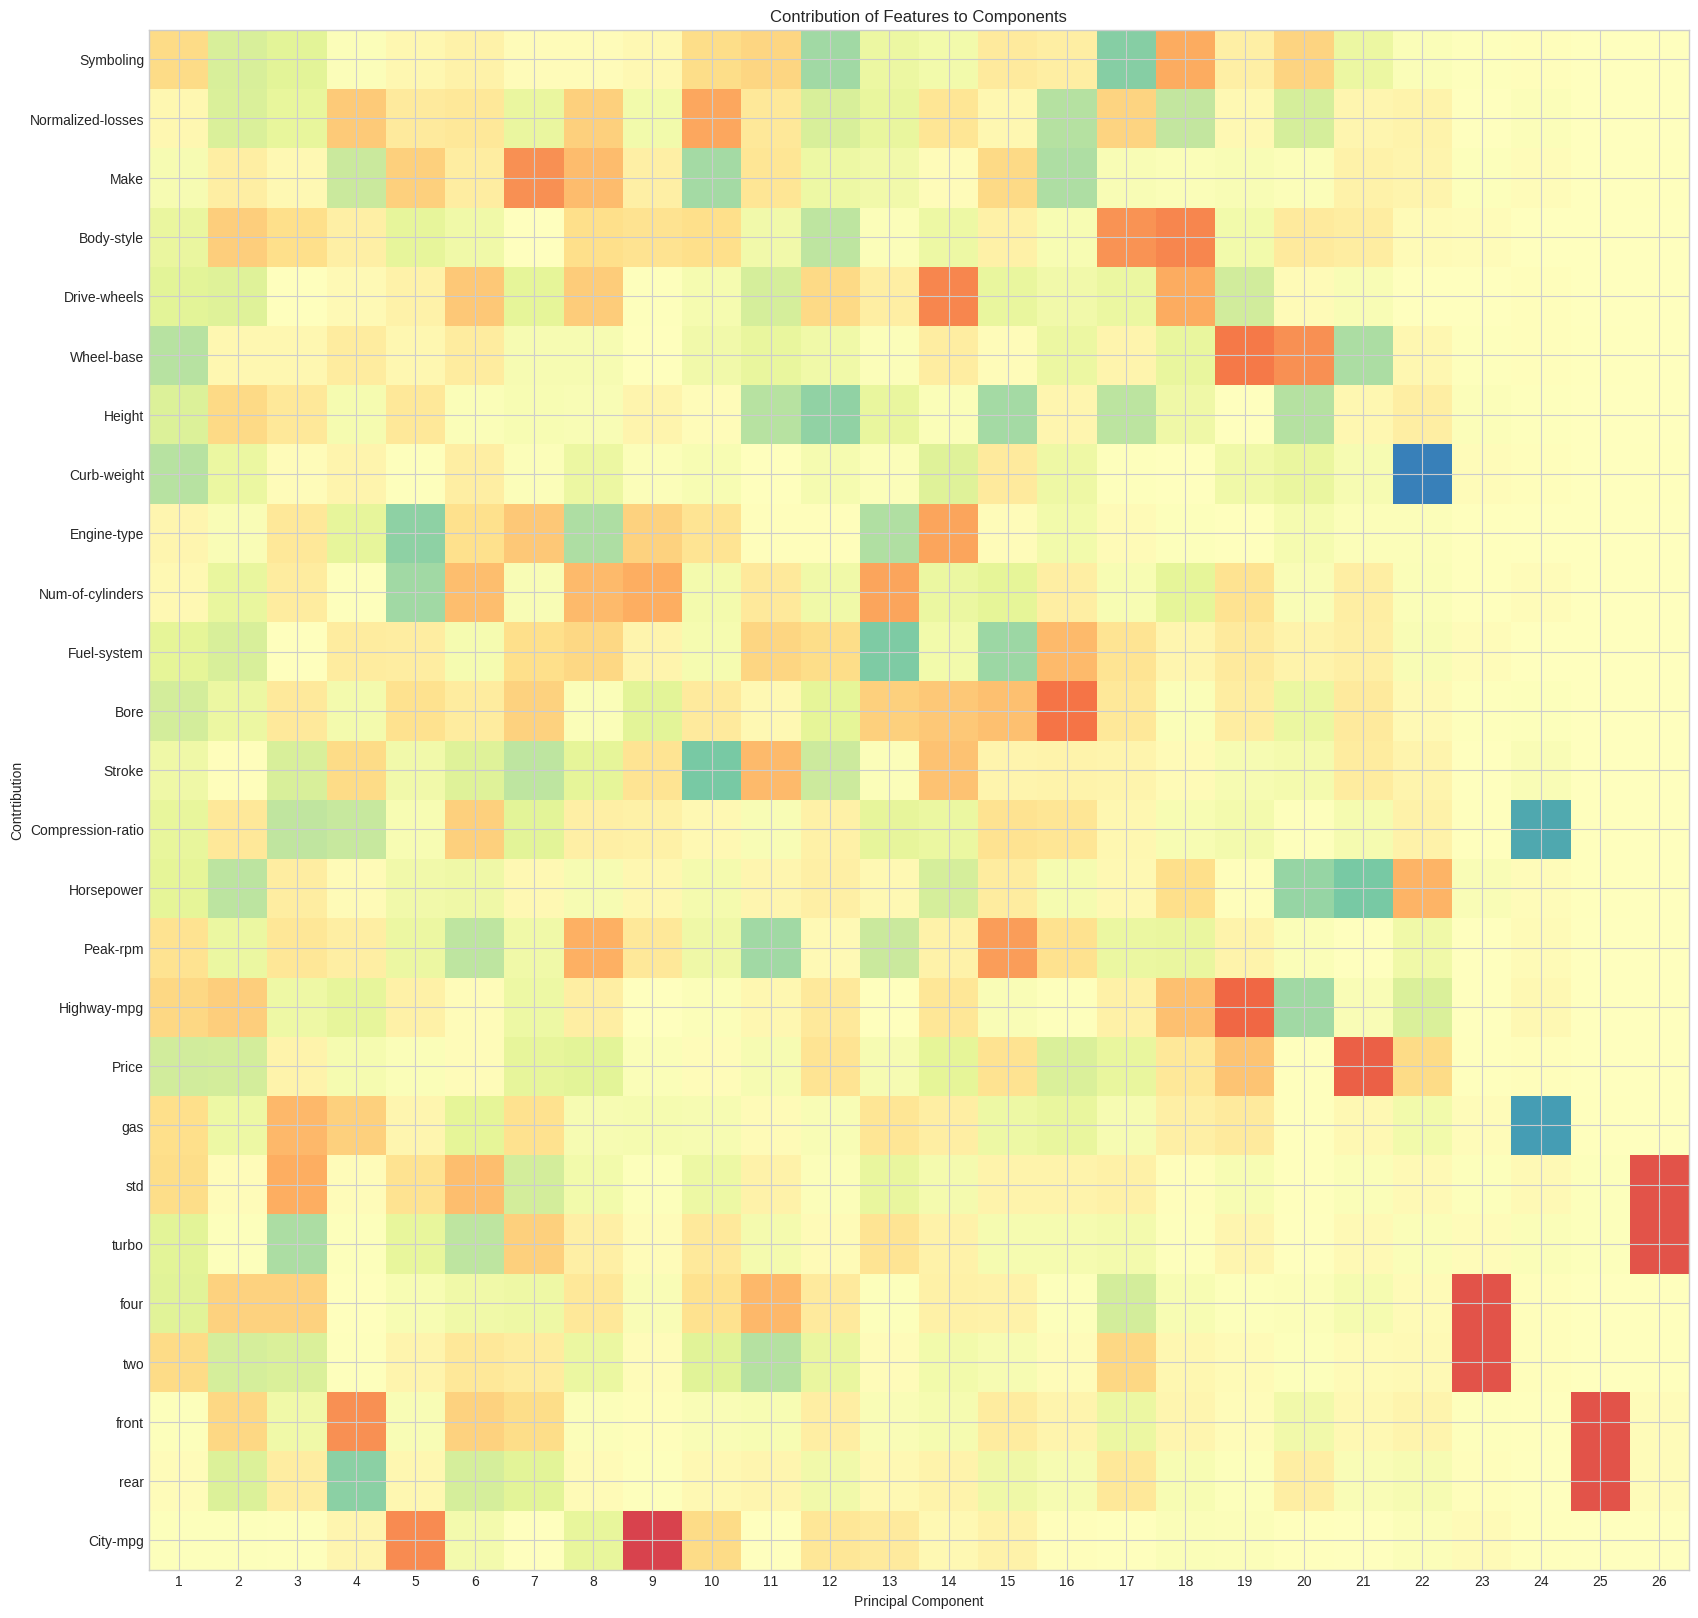

In [ ]:
X = n_df_B2
fig, ax = plt.subplots(figsize=(20,20))
plt.imshow(pca.components_.T, cmap='Spectral', vmin=-1, vmax=1)
plt.yticks(range(len(X.columns)), X.columns)
plt.xticks(range(26), range(1,27))
plt.xlabel('Principal Component')
plt.ylabel('Contrtibution')
plt.title('Contribution of Features to Components')
plt.colorbar

Curb-weight seems to have high-contribution<br>City-mpg seems to have low contribution

In [ ]:
n_df_B1 = (df_B1-df_B1.mean())/df_B1.std()

pca = PCA(n_components=13)
X = pca.fit_transform(n_df_B1)
X = pd.DataFrame(X)
y = n_df_B2['City-mpg']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.3, random_state=42)

dr = DummyRegressor()
dr.fit(X_train, y_train)
postPCAscore = dr.score(X_test, y_test)
print(prePCAscore, postPCAscore)

-0.0037513700929481253 -0.0037513700929481253


In [ ]:
df_info = pd.DataFrame(df.dtypes, columns=['Dtype'])
df_info['Nunique'] = df.nunique()
df_info['MissingValues'] = df.isnull().sum()
df_info['COunt'] = df.count()
df_info['ZeroValues'] = (df==0).sum()
df_info['?Values'] = (df=='?').sum()
df_info

,Dtype,Nunique,MissingValues,COunt,ZeroValues,?Values
Symboling,int64,6,0,205,67,0
Normalized-losses,object,52,0,205,0,41
Make,int64,22,0,205,3,0
Fuel-type,object,2,0,205,0,0
Aspiration,object,2,0,205,0,0
Num-of-doors,object,3,0,205,0,2
Body-style,int64,5,0,205,6,0
Drive-wheels,int64,3,0,205,9,0
Engine-location,object,2,0,205,0,0
Wheel-base,float64,53,0,205,0,0


In [ ]:
numerical_columns = []
categorical_columns = []

for i in df.columns[:]:
    if(df[i].dtype=='object'):
        categorical_columns.append(i)
    else:
        numerical_columns.append(i)

print('Numerical variables: ', numerical_columns)
print('Categorical variables: ', categorical_columns)

Numerical variables:  ['Symboling', 'Make', 'Body-style', 'Drive-wheels', 'Wheel-base', 'Length', 'Width', 'Height', 'Curb-weight', 'Engine-type', 'Num-of-cylinders', 'Engine-size', 'Fuel-system', 'Compression-ratio', 'City-mpg', 'Highway-mpg']
Categorical variables:  ['Normalized-losses', 'Fuel-type', 'Aspiration', 'Num-of-doors', 'Engine-location', 'Bore', 'Stroke', 'Horsepower', 'Peak-rpm', 'Price']


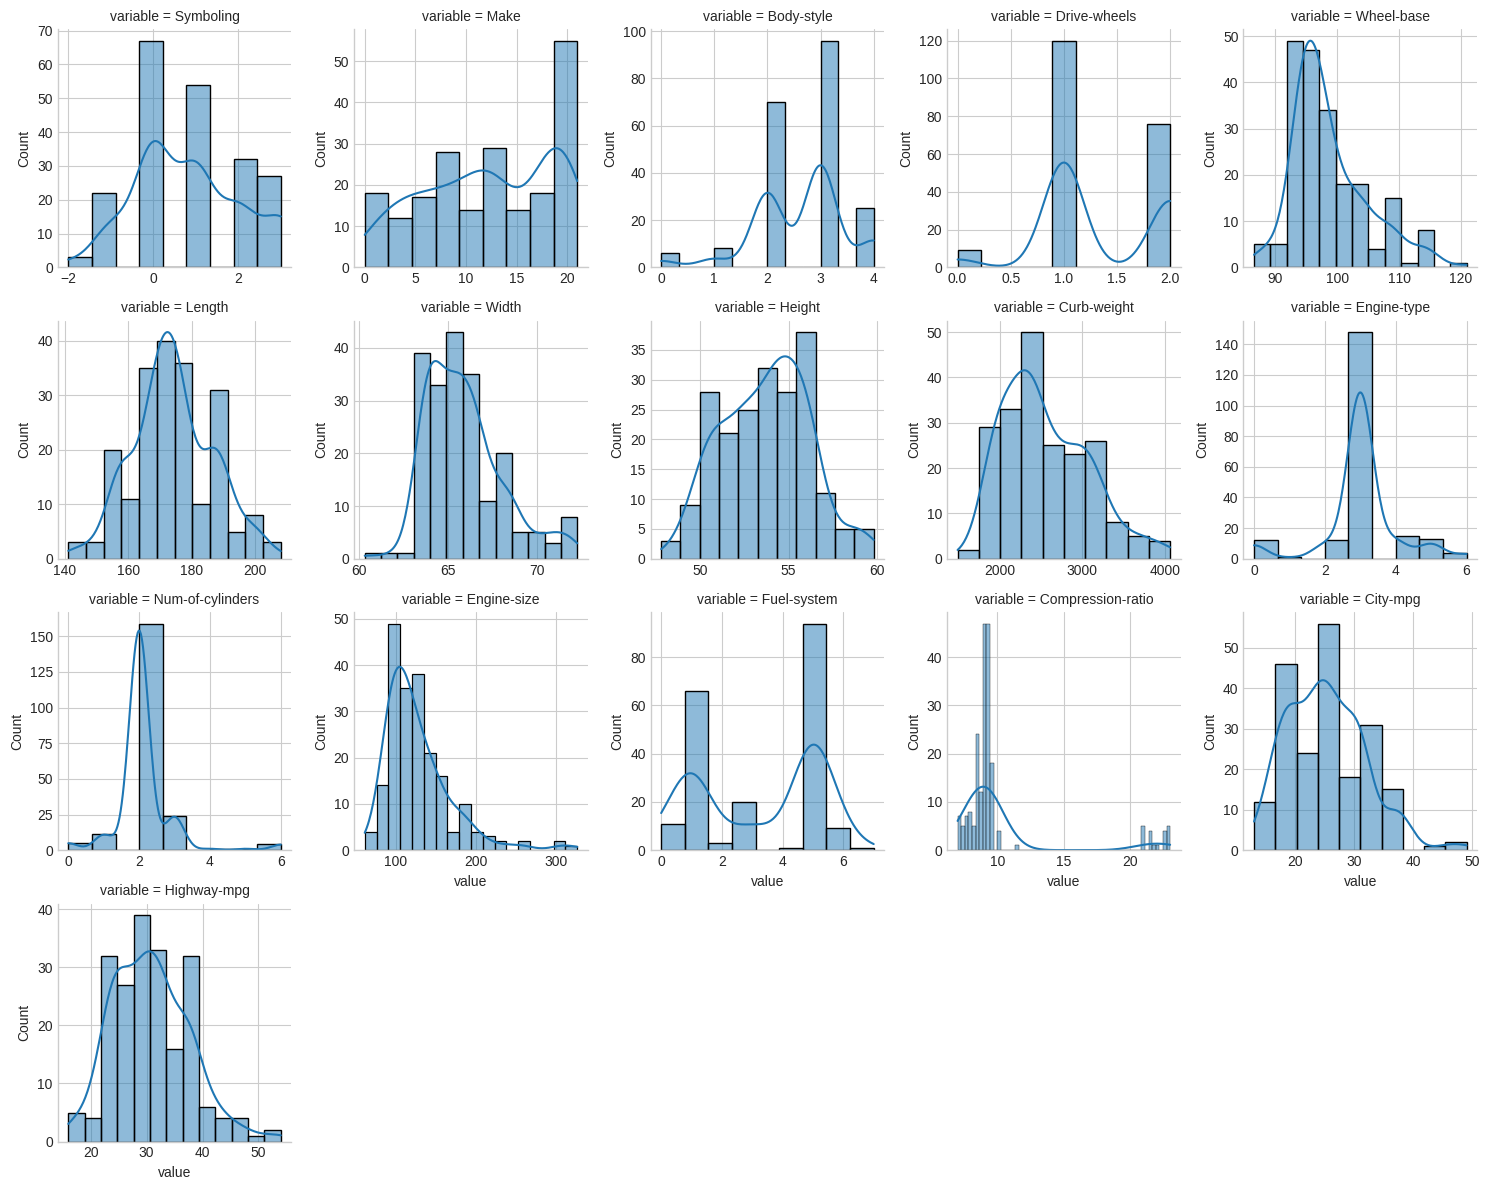

In [ ]:
nd = pd.melt(df[numerical_columns])
n1 = sns.FacetGrid(nd, col='variable', col_wrap=5, sharex=False, sharey=False)
n1 = n1.map(sns.histplot, 'value', kde=True)

All the attributes besides compression-ratio seem to have a normal distributin

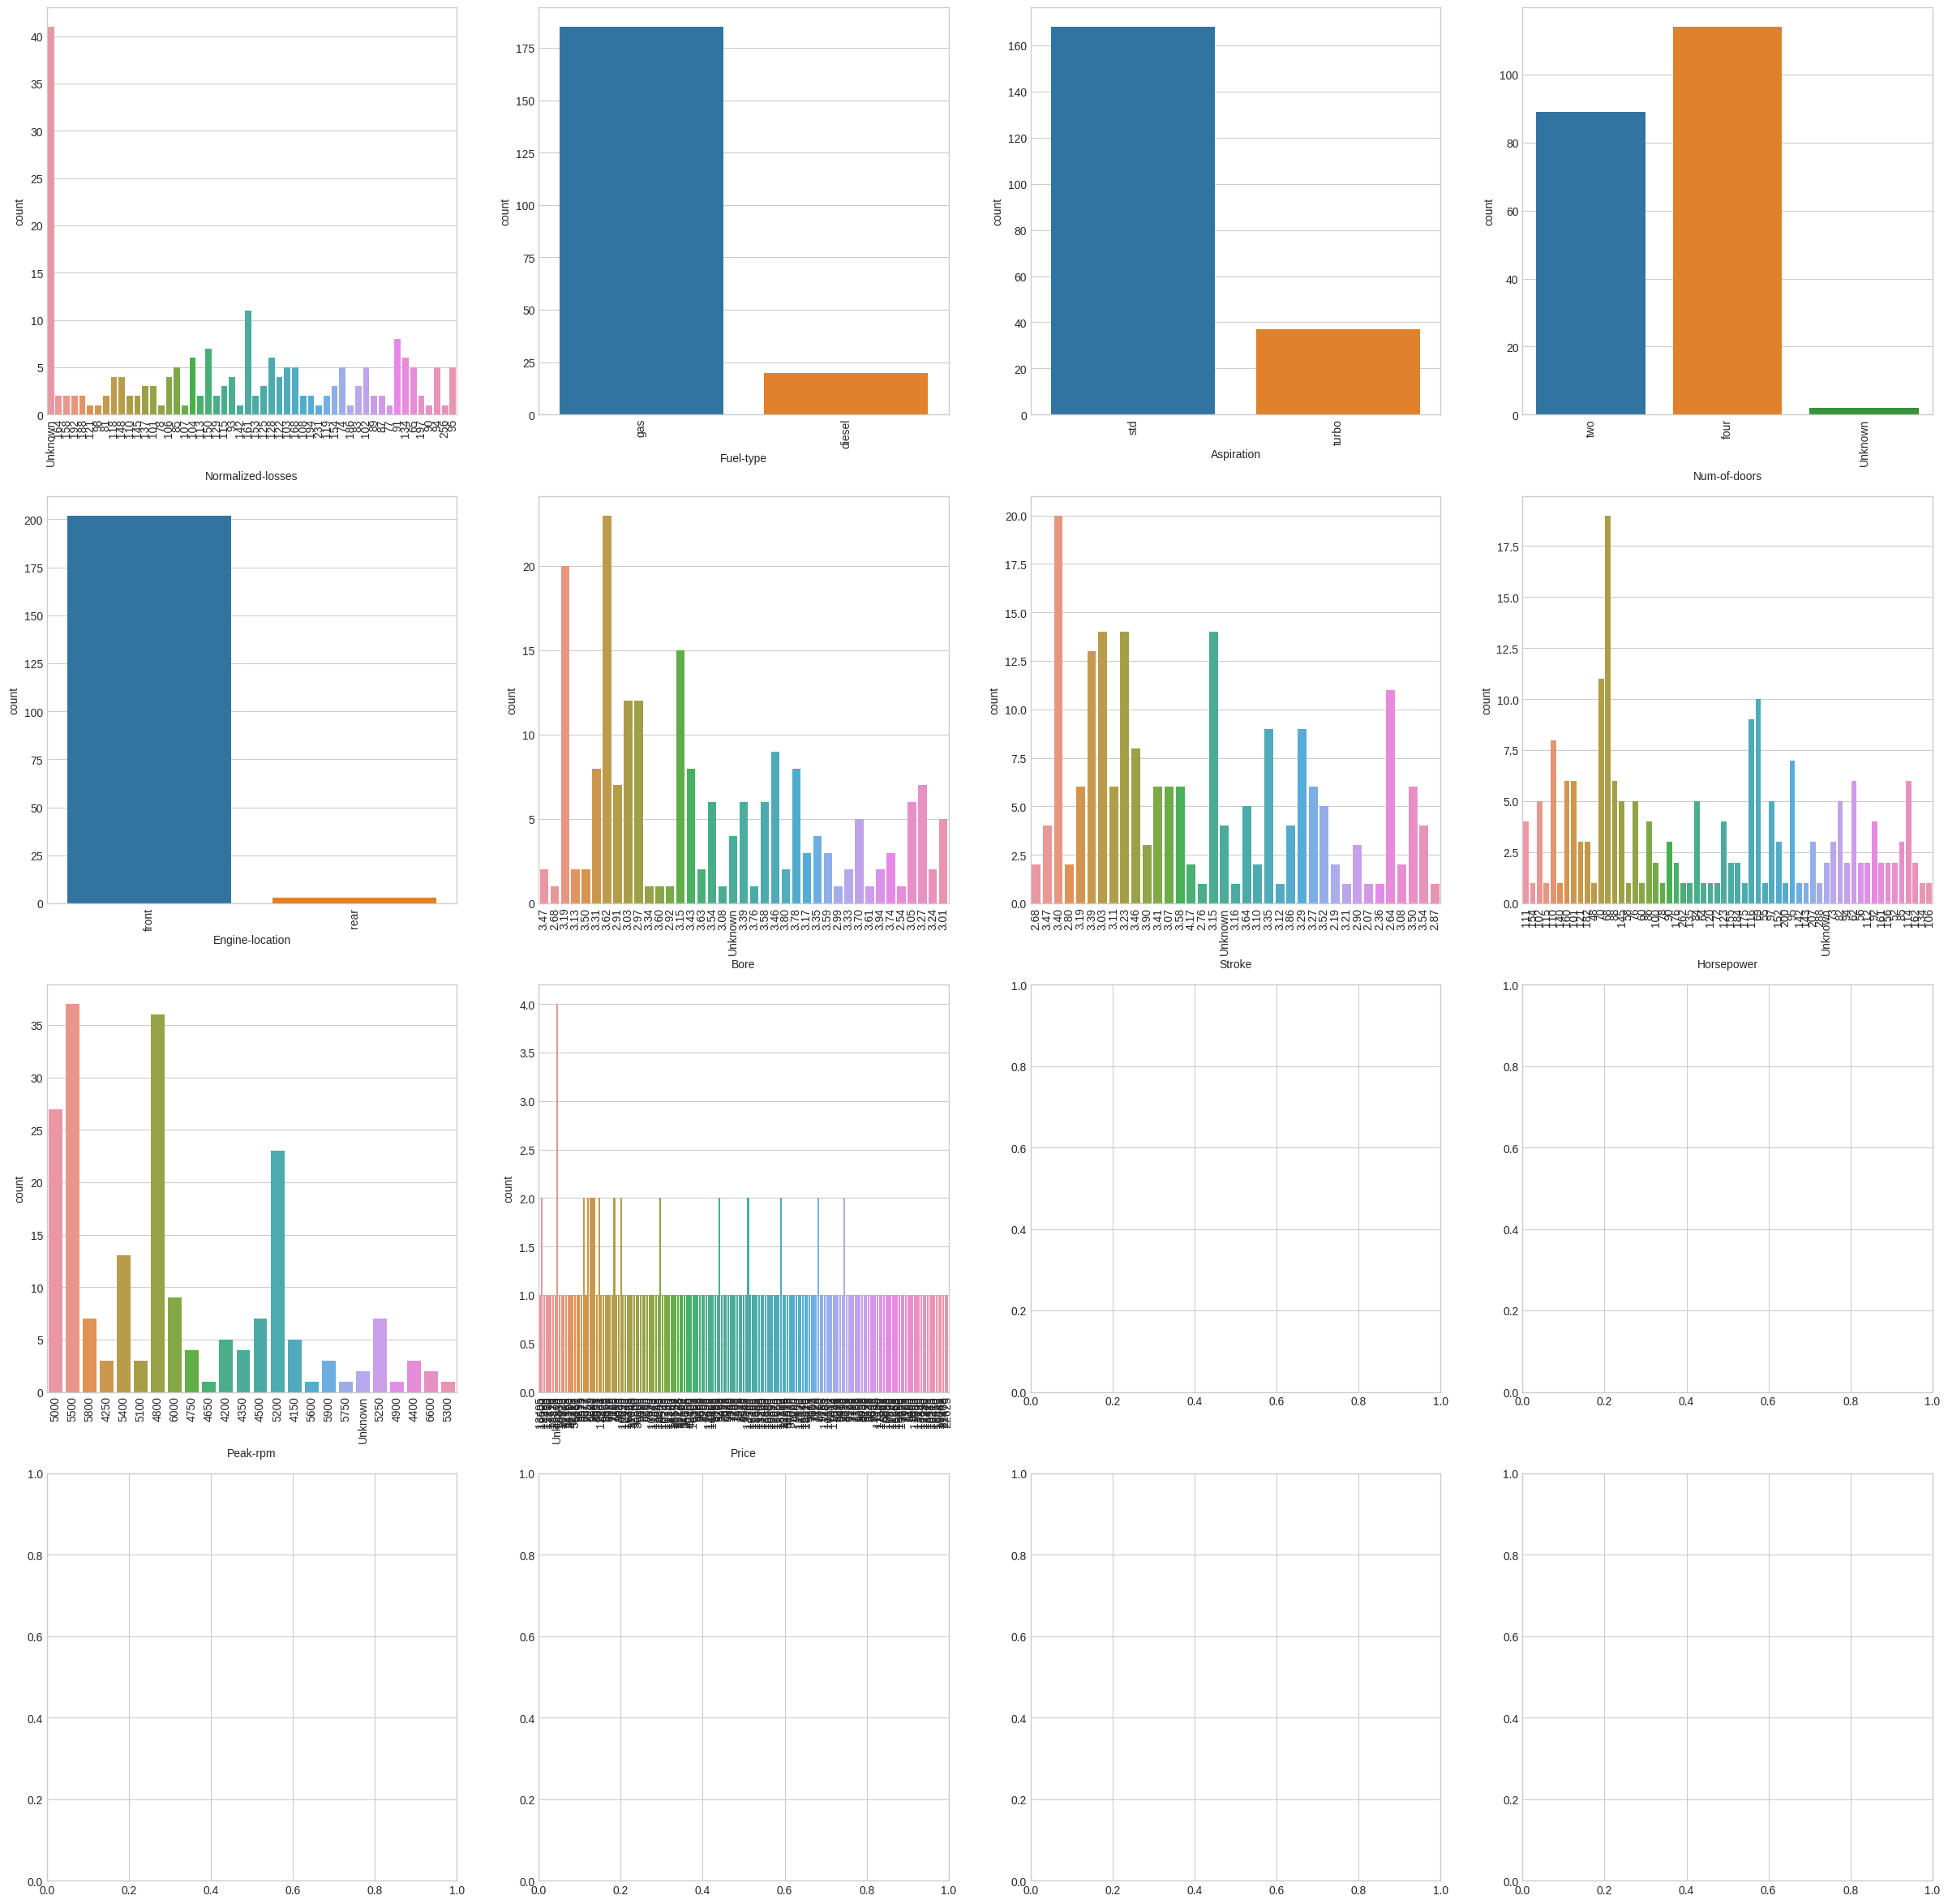

In [ ]:
fig, ax = plt.subplots(4, 4, figsize=(30,30))
for variable, subplot in zip(categorical_columns, ax.flatten()):
    sns.countplot(x=variable, data=df, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

Many of the categorical columns are skewed, such as engine-location.

In [ ]:
df.replace('?', np.nan)
miss = df02.isnull().sum()
miss = miss[miss > 0]
miss.sort_values(inplace=True)
print(miss)

Num-of-doors          2
Horsepower            2
Peak-rpm              2
Bore                  4
Stroke                4
Price                 4
Normalized-losses    41
dtype: int64


In [ ]:
df02.shape[0] - df02.isnull().sum(axis=0).shape[0]

179

Text(0.5, 1.0, 'Percents of Nonmissing Data With Missing Numbers')

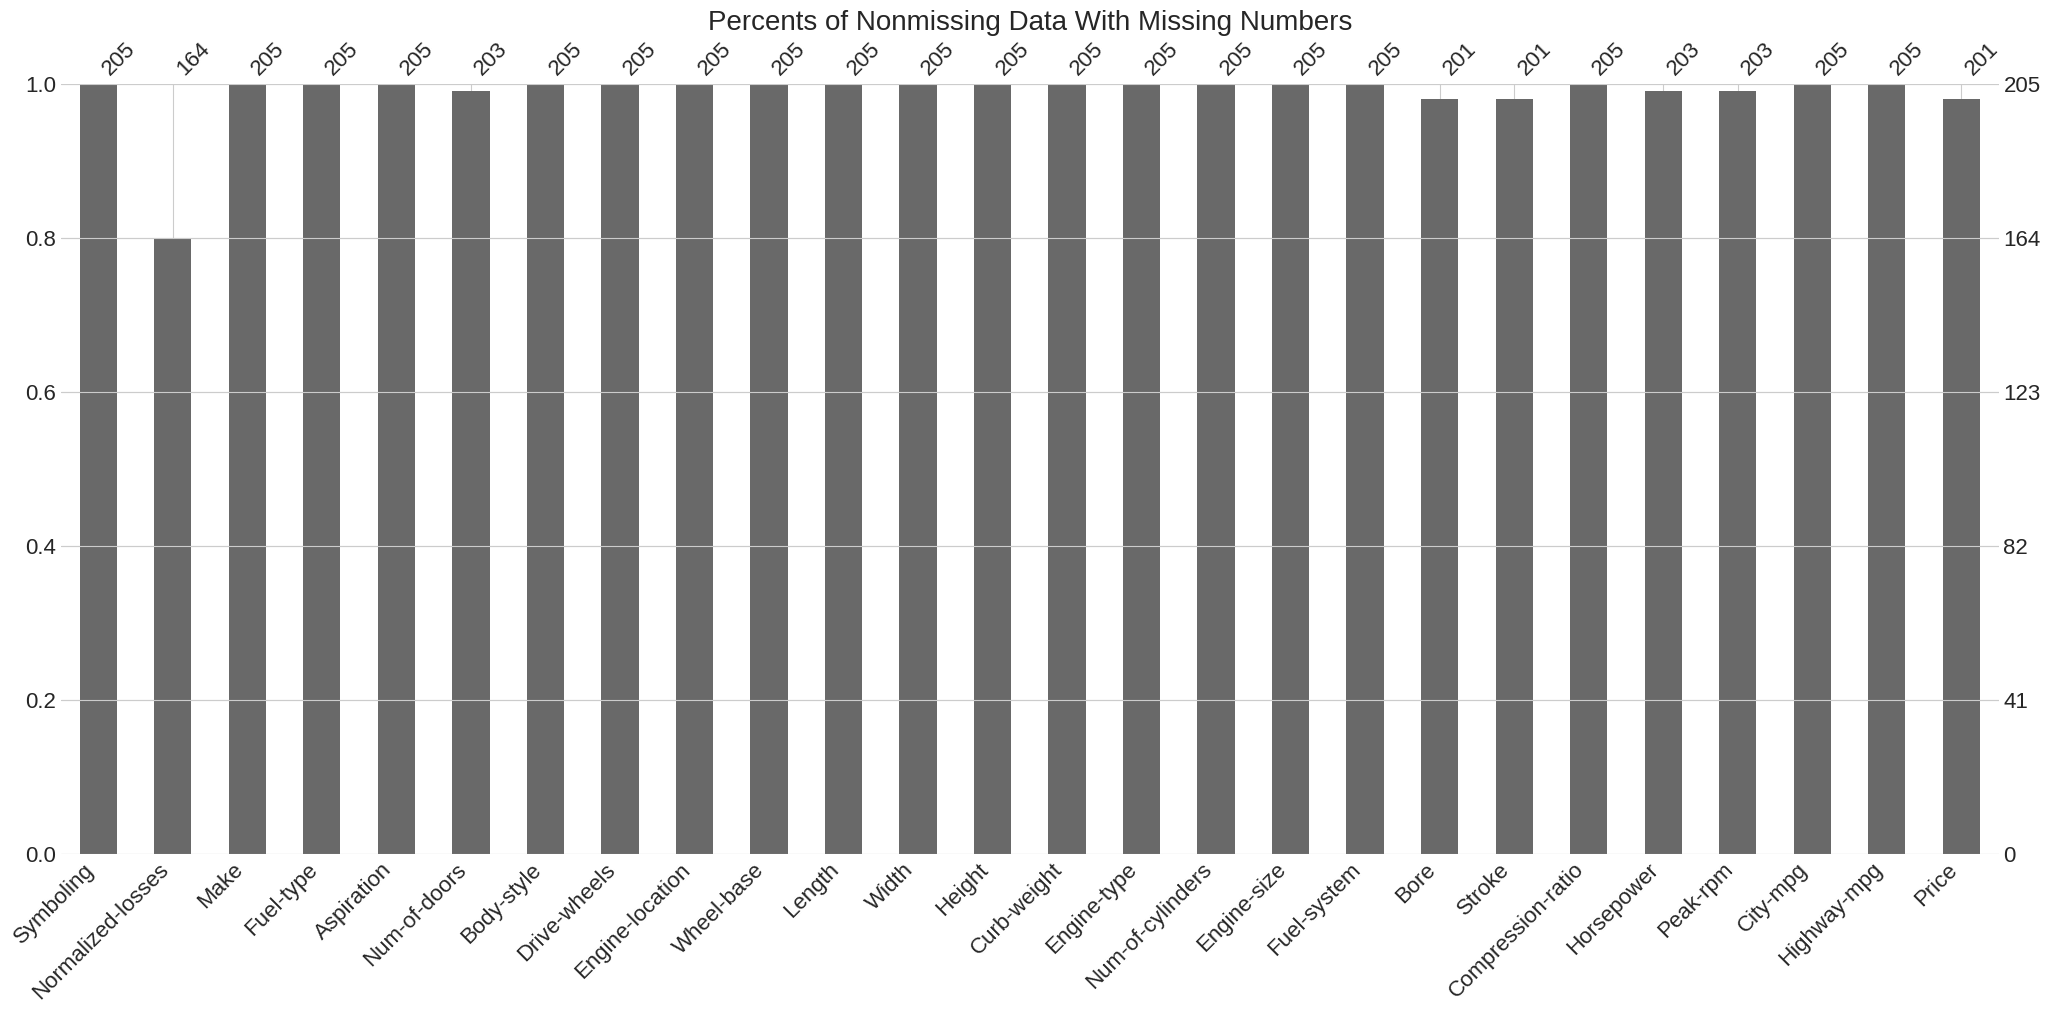

In [ ]:
msno.bar(df02)
plt.title('Percents of Nonmissing Data With Missing Numbers', fontsize=20)

There are 7 explanatory variables with missing values: normalized-losses, num-of-doors, bore, stroke, horsepower, peak-rpm, and price.

In [ ]:
df02[['Bore', 'Stroke']] = df02[['Bore', 'Stroke']].astype('float')
df02[['Normalized-losses', 'Horsepower', 'Price', 'Peak-rpm']] = df02[['Normalized-losses', 'Horsepower', 'Price', 'Peak-rpm']].astype('float')
df02[['Symboling']] = df02[['Symboling']].astype('str')
df02.info

<bound method DataFrame.info of     Symboling  Normalized-losses  Make Fuel-type Aspiration Num-of-doors  \
0           3                NaN     0       gas        std          two   
1           3                NaN     0       gas        std          two   
2           1                NaN     0       gas        std          two   
3           2              164.0     1       gas        std         four   
4           2              164.0     1       gas        std         four   
..        ...                ...   ...       ...        ...          ...   
200        -1               95.0    21       gas        std         four   
201        -1               95.0    21       gas      turbo         four   
202        -1               95.0    21       gas        std         four   
203        -1               95.0    21    diesel      turbo         four   
204        -1               95.0    21       gas      turbo         four   

     Body-style  Drive-wheels Engine-location  Wheel-ba

In [ ]:
new_numerical_columns = []
new_categorical_columns = []

for i in df02.columns[:]:
    if(df02[i].dtype=='object'):
        new_categorical_columns.append(i)
    else:
        new_numerical_columns.append(i)

print('Before converting : Numerical variables', numerical_columns)
print('After converting : Numerical variables', new_numerical_columns)
print('Before converting : Categorical variables', categorical_columns)
print('After converting : categorical variables', new_categorical_columns)

Before converting : Numerical variables ['Symboling', 'Make', 'Body-style', 'Drive-wheels', 'Wheel-base', 'Length', 'Width', 'Height', 'Curb-weight', 'Engine-type', 'Num-of-cylinders', 'Engine-size', 'Fuel-system', 'Compression-ratio', 'City-mpg', 'Highway-mpg']
After converting : Numerical variables ['Normalized-losses', 'Make', 'Body-style', 'Drive-wheels', 'Wheel-base', 'Length', 'Width', 'Height', 'Curb-weight', 'Engine-type', 'Num-of-cylinders', 'Engine-size', 'Fuel-system', 'Bore', 'Stroke', 'Compression-ratio', 'Horsepower', 'Peak-rpm', 'City-mpg', 'Highway-mpg', 'Price']
Before converting : Categorical variables ['Normalized-losses', 'Fuel-type', 'Aspiration', 'Num-of-doors', 'Engine-location', 'Bore', 'Stroke', 'Horsepower', 'Peak-rpm', 'Price']
After converting : categorical variables ['Symboling', 'Fuel-type', 'Aspiration', 'Num-of-doors', 'Engine-location']


In [ ]:
df03 = df02.copy()
df03[df03['Num-of-doors'].isnull()]

,Symboling,Normalized-losses,Make,Fuel-type,Aspiration,Num-of-doors,Body-style,Drive-wheels,Engine-location,Wheel-base,...,Engine-size,Fuel-system,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
27,1,148.0,4,gas,turbo,NaN,3,1,front,93.7,...,98,5,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,NaN,8,diesel,std,NaN,3,1,front,98.8,...,122,3,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


In [ ]:
df03.loc[(df03['Body-style'] == 'sedan') & (df03['Make'] == 'mazda')]['Num-of-doors'].mode()

Series([], Name: Num-of-doors, dtype: object)

In [ ]:
df03['Num-of-doors'] = df03['Num-of-doors'].fillna('four')

In [ ]:
miss02 = df03.isnull().sum()
miss02 = miss02[miss02 > 0]
miss02.sort_values(inplace=True)
miss02

Horsepower            2
Peak-rpm              2
Bore                  4
Stroke                4
Price                 4
Normalized-losses    41
dtype: int64

In [ ]:
df03.groupby(['Num-of-doors']).count()

,Symboling,Normalized-losses,Make,Fuel-type,Aspiration,Body-style,Drive-wheels,Engine-location,Wheel-base,Length,...,Engine-size,Fuel-system,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
Num-of-doors,,,,,,,,,,,,,,,,,,,,,
four,116,96,116,116,116,116,116,116,116,116,...,116,116,116,116,116,115,115,116,116,115
two,89,68,89,89,89,89,89,89,89,89,...,89,89,85,85,89,88,88,89,89,86


In [ ]:
from numpy import nan
from numpy import isnan

df04 = df03[new_numerical_columns]
values = df04.values
imputer = SimpleImputer(missing_values=nan, strategy='mean')
transformed_values = imputer.fit_transform(values)
print('Missing %d' % isnan(transformed_values).sum())

Missing 0


In [ ]:
df05 = pd.DataFrame(transformed_values)
df05.columns = ['Normalized-losses', 'Make', 'Body-style', 'Drive-wheels', 'Wheel-base', 'Length', 'Width', 'Height',
                'Curb-weight', 'Engine-type', 'Num-of-cylinders', 'Engine-size', 'Fuel-system', 'Bore', 'Stroke',
                'Compression-ratio', 'Horsepower', 'Peak-rpm', 'City-mpg', 'Highway-mpg', 'Price']
df05.head()

,Normalized-losses,Make,Body-style,Drive-wheels,Wheel-base,Length,Width,Height,Curb-weight,Engine-type,...,Engine-size,Fuel-system,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price
0,122.0,0.0,0.0,2.0,88.6,168.8,64.1,48.8,2548.0,0.0,...,130.0,5.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,0.0,0.0,2.0,88.6,168.8,64.1,48.8,2548.0,0.0,...,130.0,5.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,0.0,2.0,2.0,94.5,171.2,65.5,52.4,2823.0,5.0,...,152.0,5.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,1.0,3.0,1.0,99.8,176.6,66.2,54.3,2337.0,3.0,...,109.0,5.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,1.0,3.0,0.0,99.4,176.6,66.4,54.3,2824.0,3.0,...,136.0,5.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [ ]:
df02.describe().T

,count,mean,std,min,25%,50%,75%,max
Normalized-losses,164.0,122.000000,35.442168,65.00,94.00,115.00,150.00,256.00
Make,205.0,12.195122,6.274831,0.00,8.00,12.00,19.00,21.00
Body-style,205.0,2.614634,0.859081,0.00,2.00,3.00,3.00,4.00
Drive-wheels,205.0,1.326829,0.556171,0.00,1.00,1.00,2.00,2.00
Wheel-base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
Length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
Width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
Height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
Curb-weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
Engine-type,205.0,3.014634,1.054765,0.00,3.00,3.00,3.00,6.00


In [ ]:
df06 = df03[new_categorical_columns]
print(df06.info())
print(df05.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Symboling        205 non-null    object
 1   Fuel-type        205 non-null    object
 2   Aspiration       205 non-null    object
 3   Num-of-doors     205 non-null    object
 4   Engine-location  205 non-null    object
dtypes: object(5)
memory usage: 8.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Normalized-losses  205 non-null    float64
 1   Make               205 non-null    float64
 2   Body-style         205 non-null    float64
 3   Drive-wheels       205 non-null    float64
 4   Wheel-base         205 non-null    float64
 5   Length             205 non-null    float64
 6   Width              205 non-null    float64

In [ ]:
df07 = pd.concat([df05, df06], axis=1)
df07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Normalized-losses  205 non-null    float64
 1   Make               205 non-null    float64
 2   Body-style         205 non-null    float64
 3   Drive-wheels       205 non-null    float64
 4   Wheel-base         205 non-null    float64
 5   Length             205 non-null    float64
 6   Width              205 non-null    float64
 7   Height             205 non-null    float64
 8   Curb-weight        205 non-null    float64
 9   Engine-type        205 non-null    float64
 10  Num-of-cylinders   205 non-null    float64
 11  Engine-size        205 non-null    float64
 12  Fuel-system        205 non-null    float64
 13  Bore               205 non-null    float64
 14  Stroke             205 non-null    float64
 15  Compression-ratio  205 non-null    float64
 16  Horsepower         205 non

Text(0.5, 0, 'Dataset with no missing')

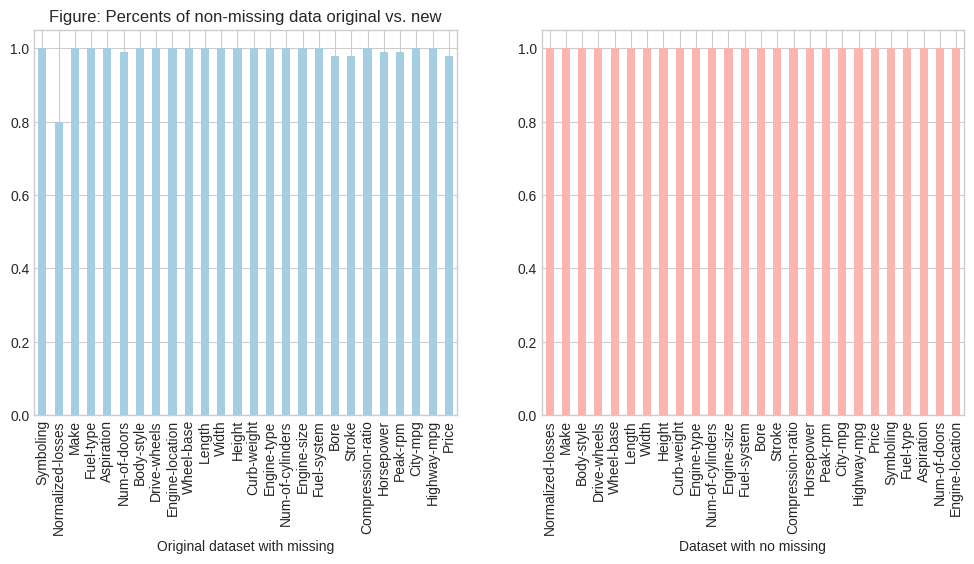

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(121)
(1 - df02.isnull().mean()).abs().plot(kind='bar', colormap='Paired')
plt.xlabel('Original dataset with missing')
plt.title('Figure: Percents of non-missing data original vs. new')

plt.subplot(122)
(1 - df07.isnull().mean()).abs().plot(kind='bar', colormap='Pastel1')
plt.xlabel('Dataset with no missing')


This confirms that our new data has no missing values.

array([[<Axes: title={'center': 'Normalized-losses'}>,
        <Axes: title={'center': 'Make'}>,
        <Axes: title={'center': 'Body-style'}>,
        <Axes: title={'center': 'Drive-wheels'}>,
        <Axes: title={'center': 'Wheel-base'}>],
       [<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Width'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Curb-weight'}>,
        <Axes: title={'center': 'Engine-type'}>],
       [<Axes: title={'center': 'Num-of-cylinders'}>,
        <Axes: title={'center': 'Engine-size'}>,
        <Axes: title={'center': 'Fuel-system'}>,
        <Axes: title={'center': 'Bore'}>,
        <Axes: title={'center': 'Stroke'}>],
       [<Axes: title={'center': 'Compression-ratio'}>,
        <Axes: title={'center': 'Horsepower'}>,
        <Axes: title={'center': 'Peak-rpm'}>,
        <Axes: title={'center': 'City-mpg'}>,
        <Axes: title={'center': 'Highway-mpg'}>],
       [<Axes: title={'center': 'Price'}>,

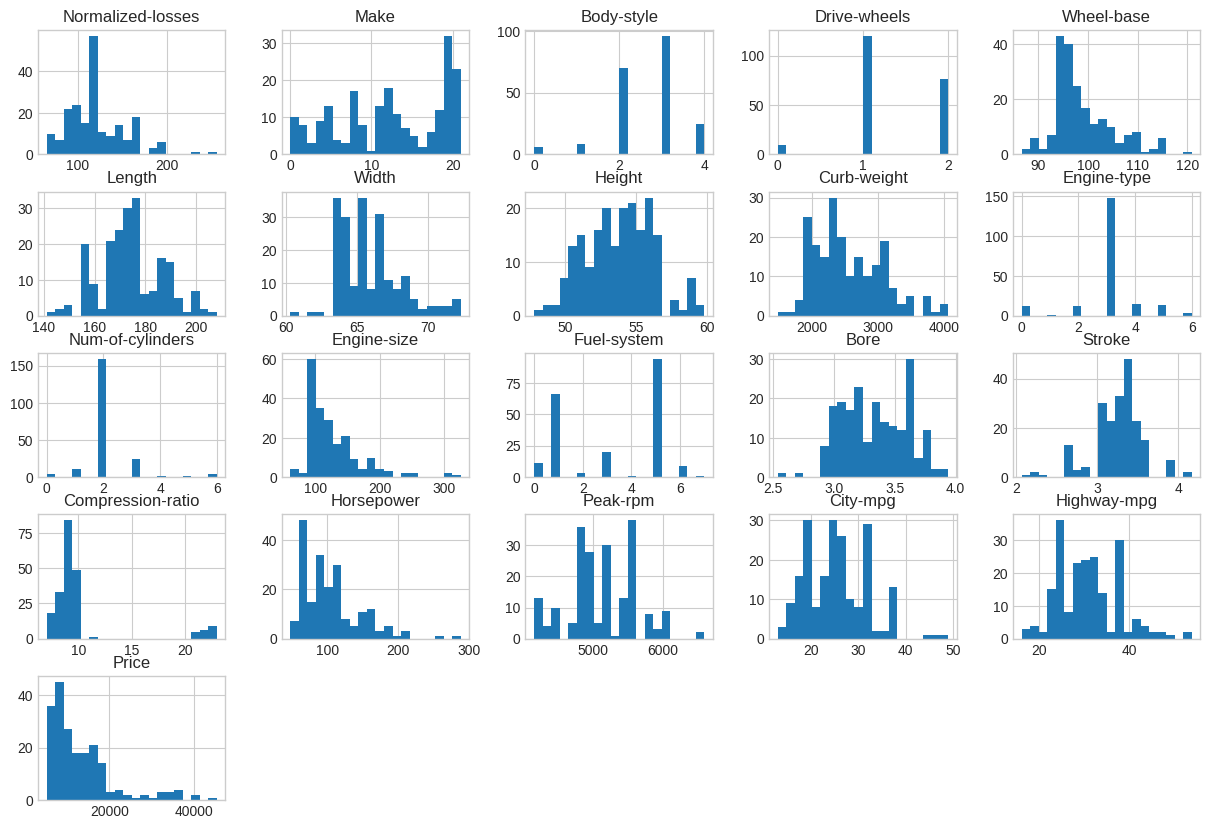

In [ ]:
df07.hist(figsize=(15,10), bins=20, xlabelsize=10, ylabelsize=10)

Compression-ratio, engine-size, horsepower, normalized-losses, price, and wheel-base are strongly right skewed.

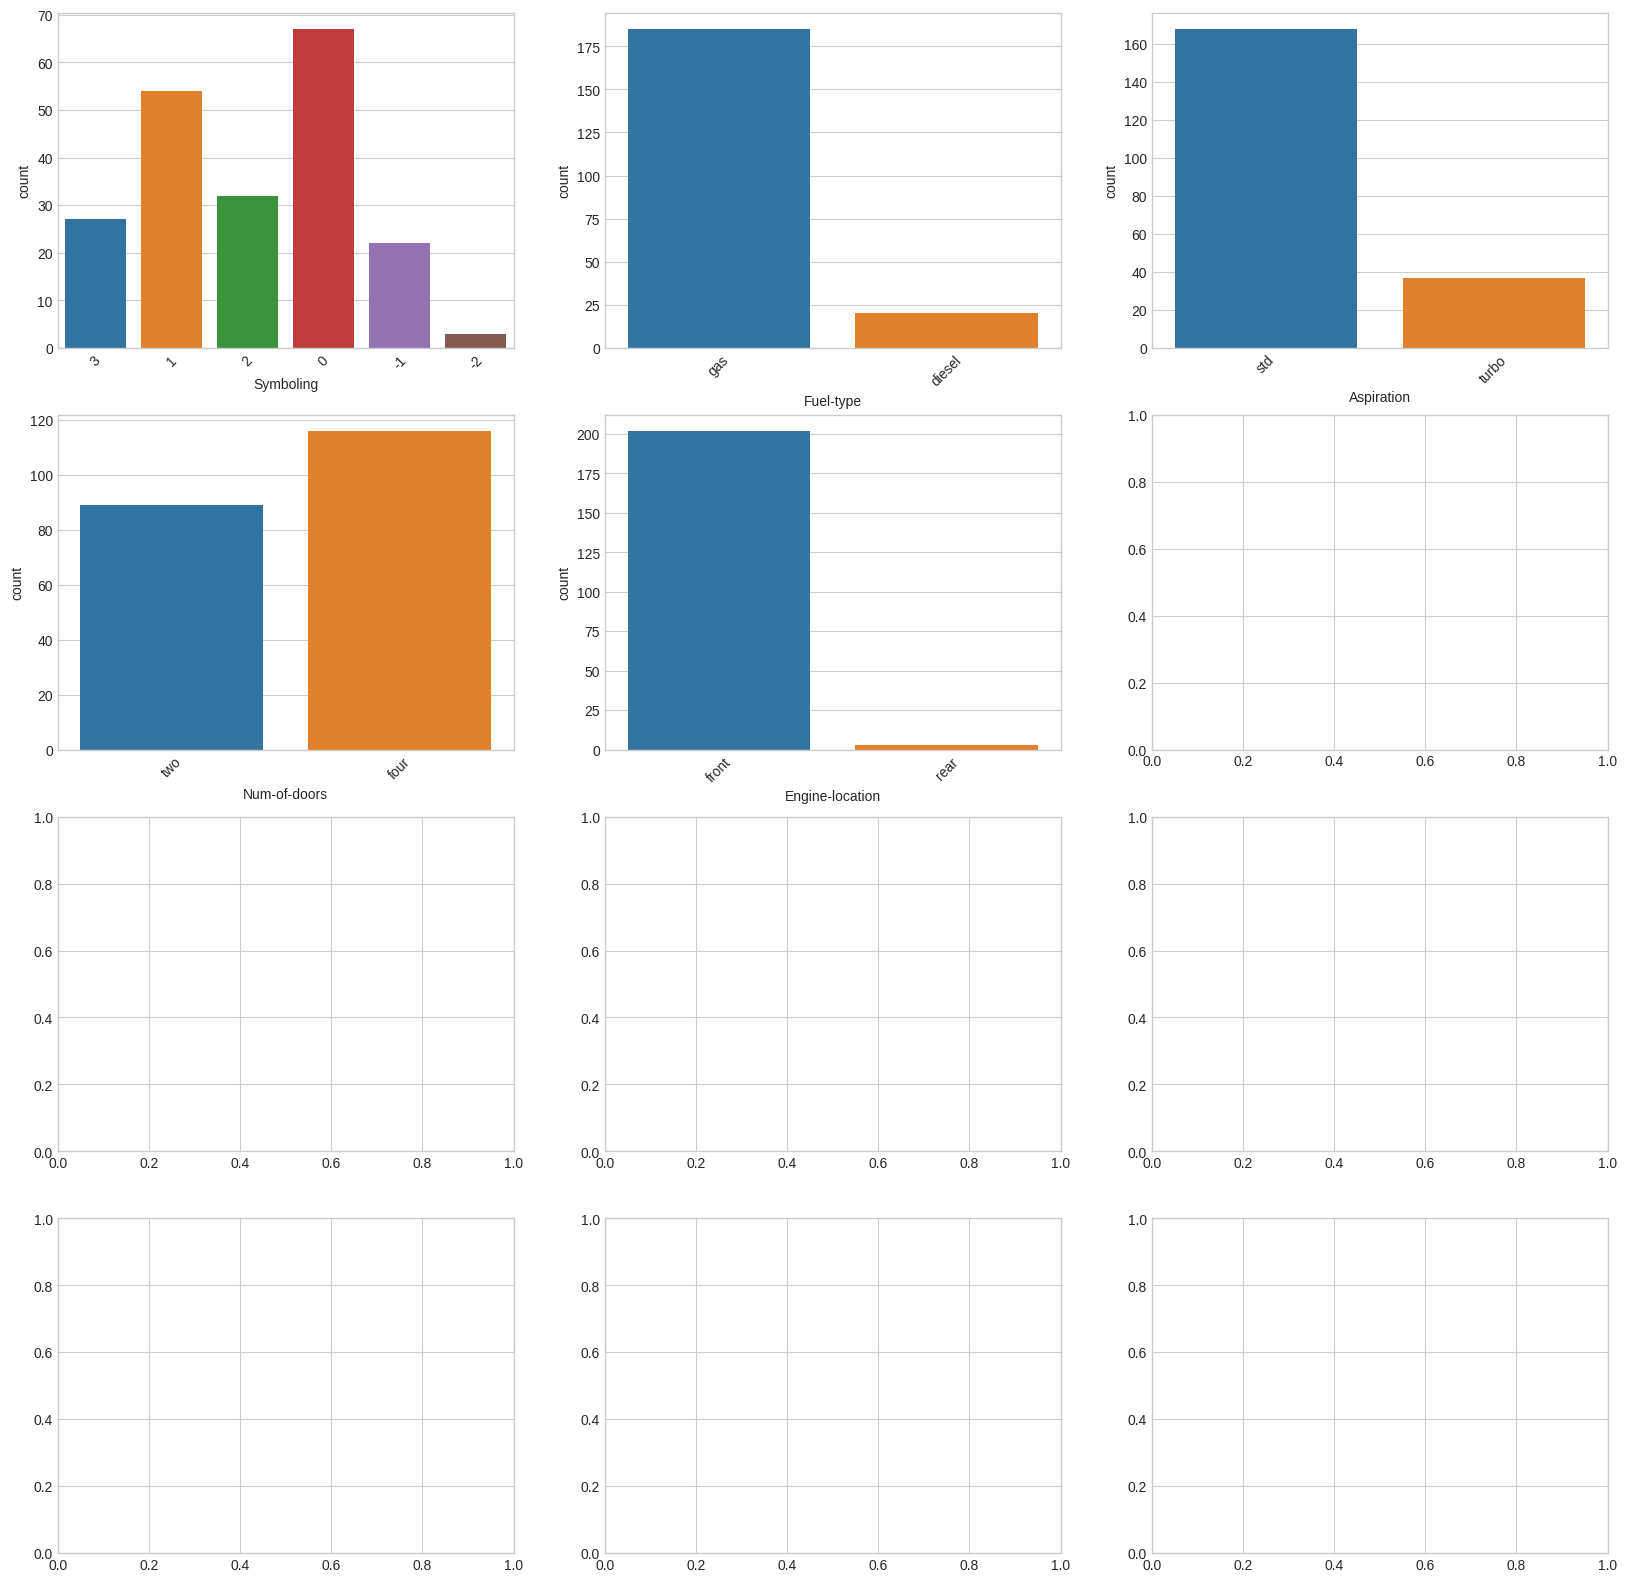

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(20,20))
for variable, subplot in zip(new_categorical_columns, ax.flatten()):
    sns.countplot(x=variable, data=df06, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

We can see the most common categories for all the variables.
<br>For example, 0 is the most common for the symboling variable at about 67.

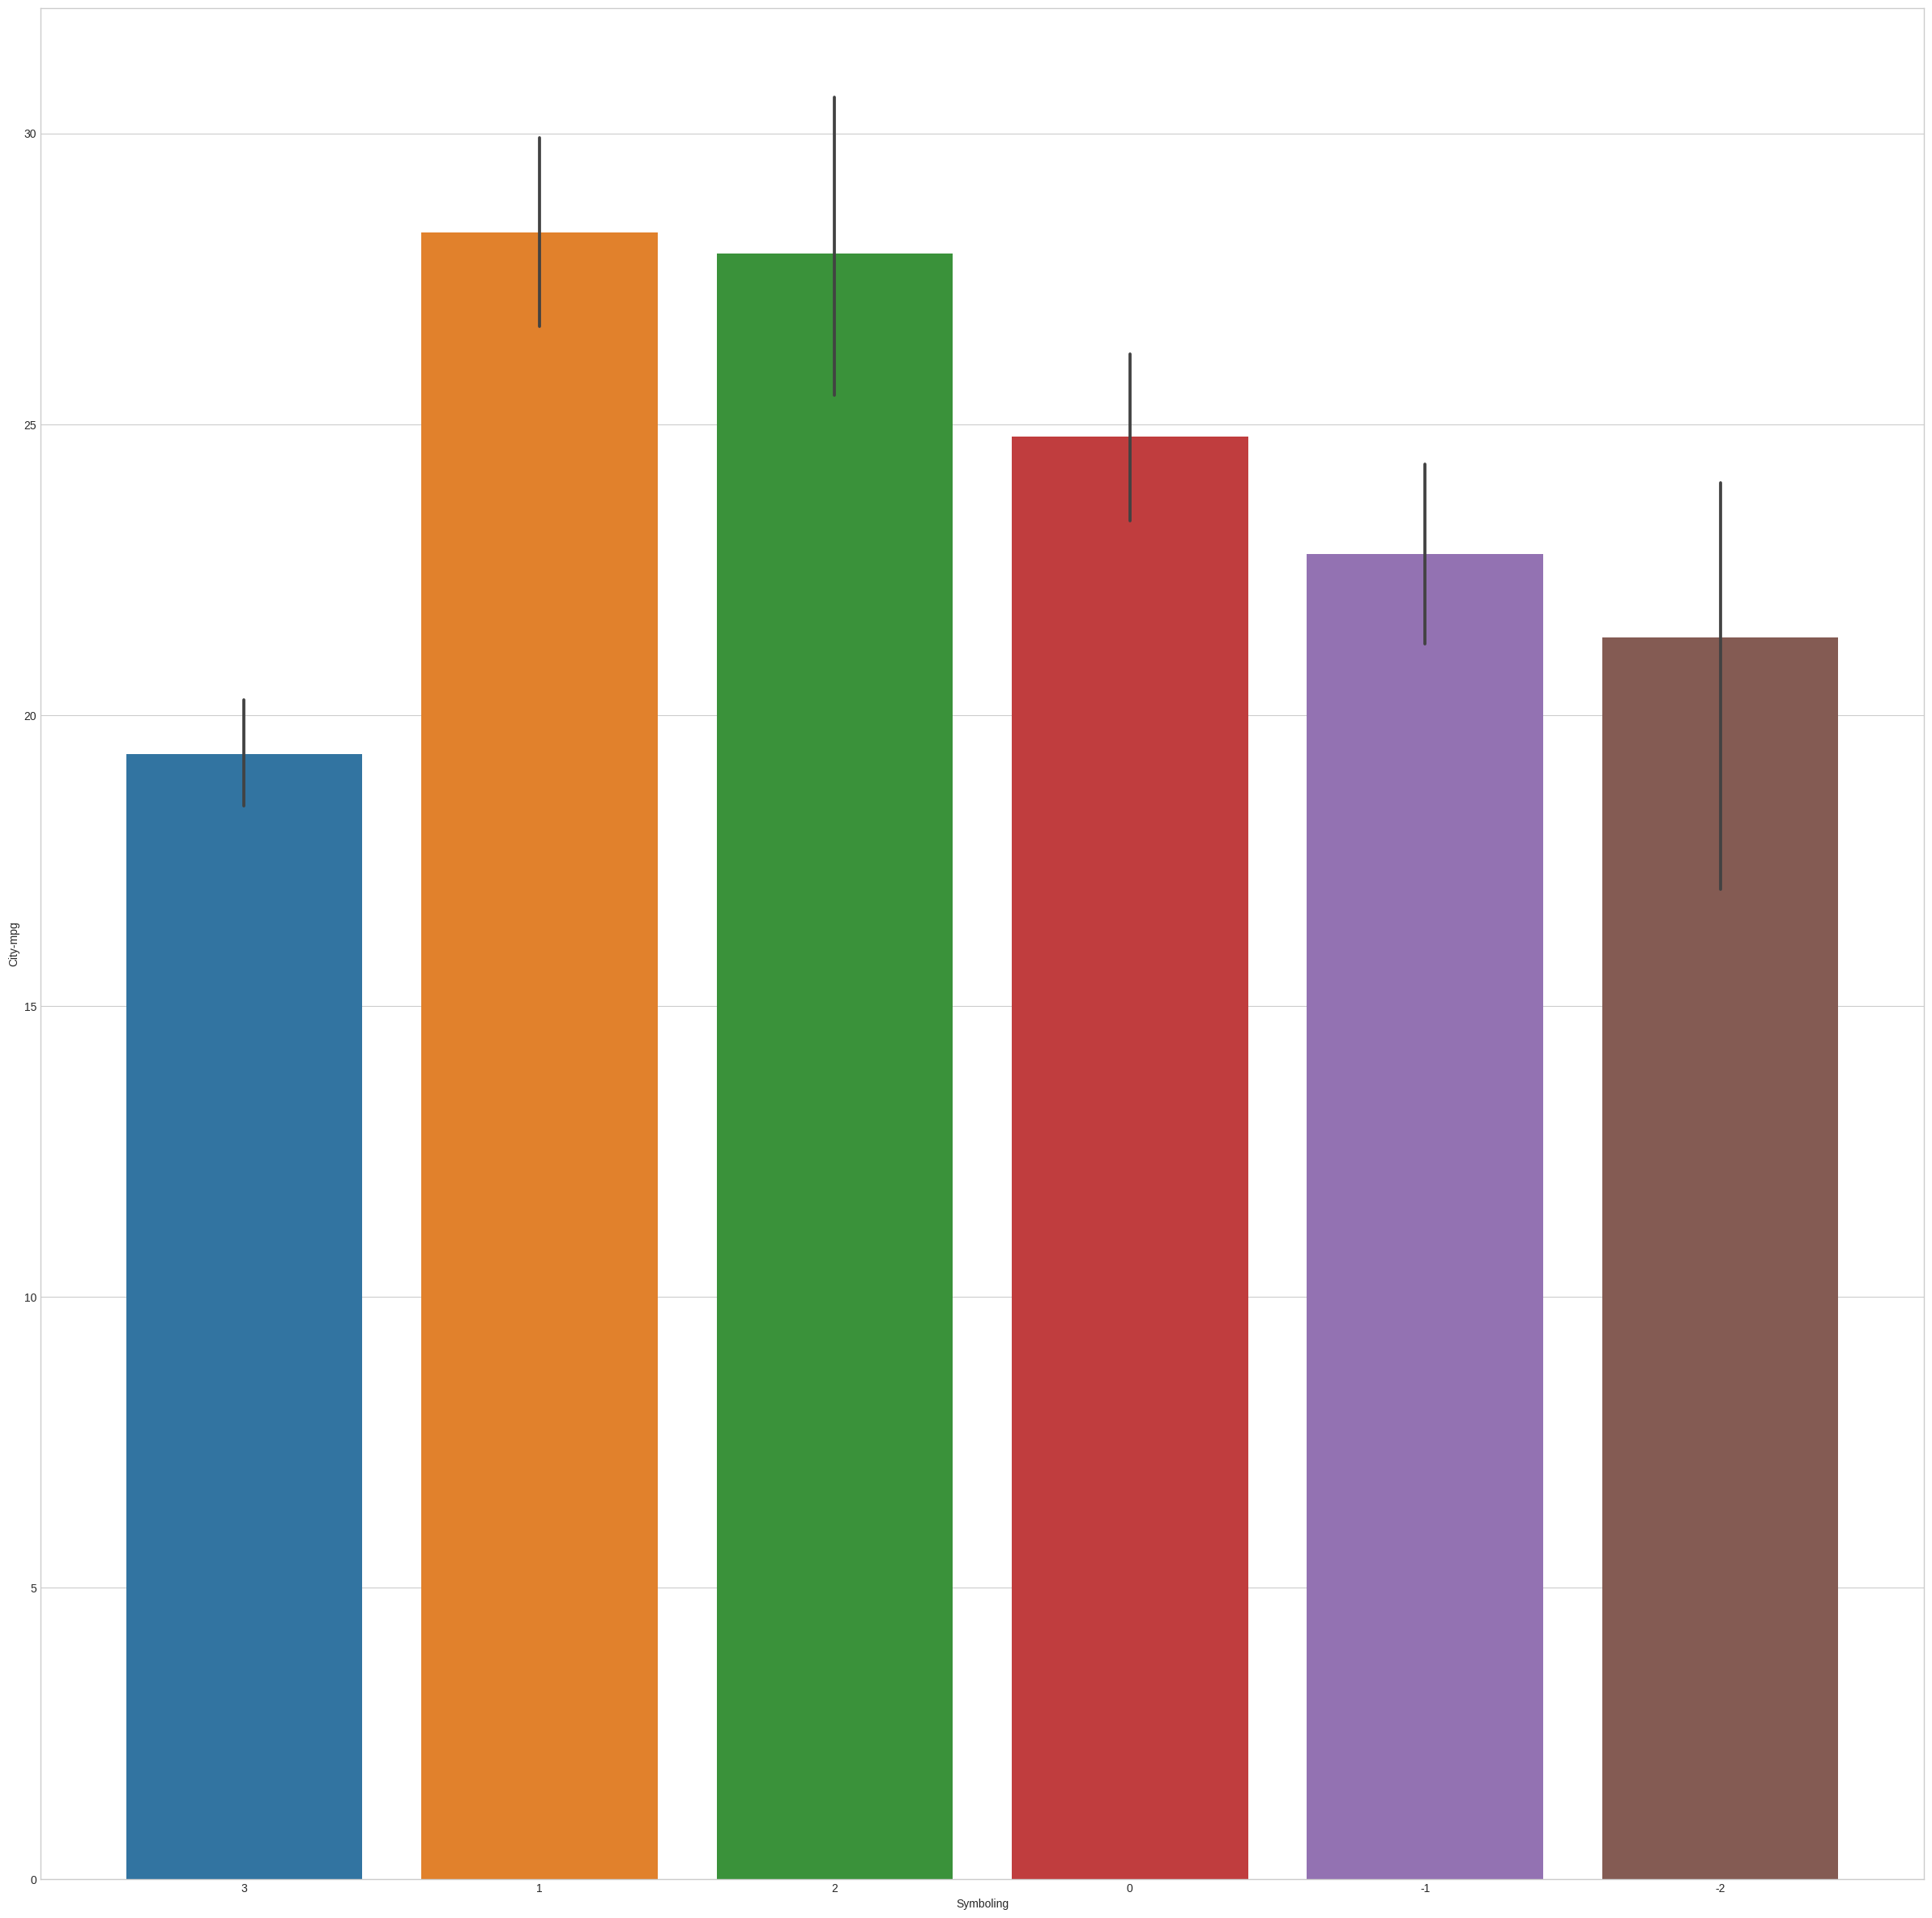

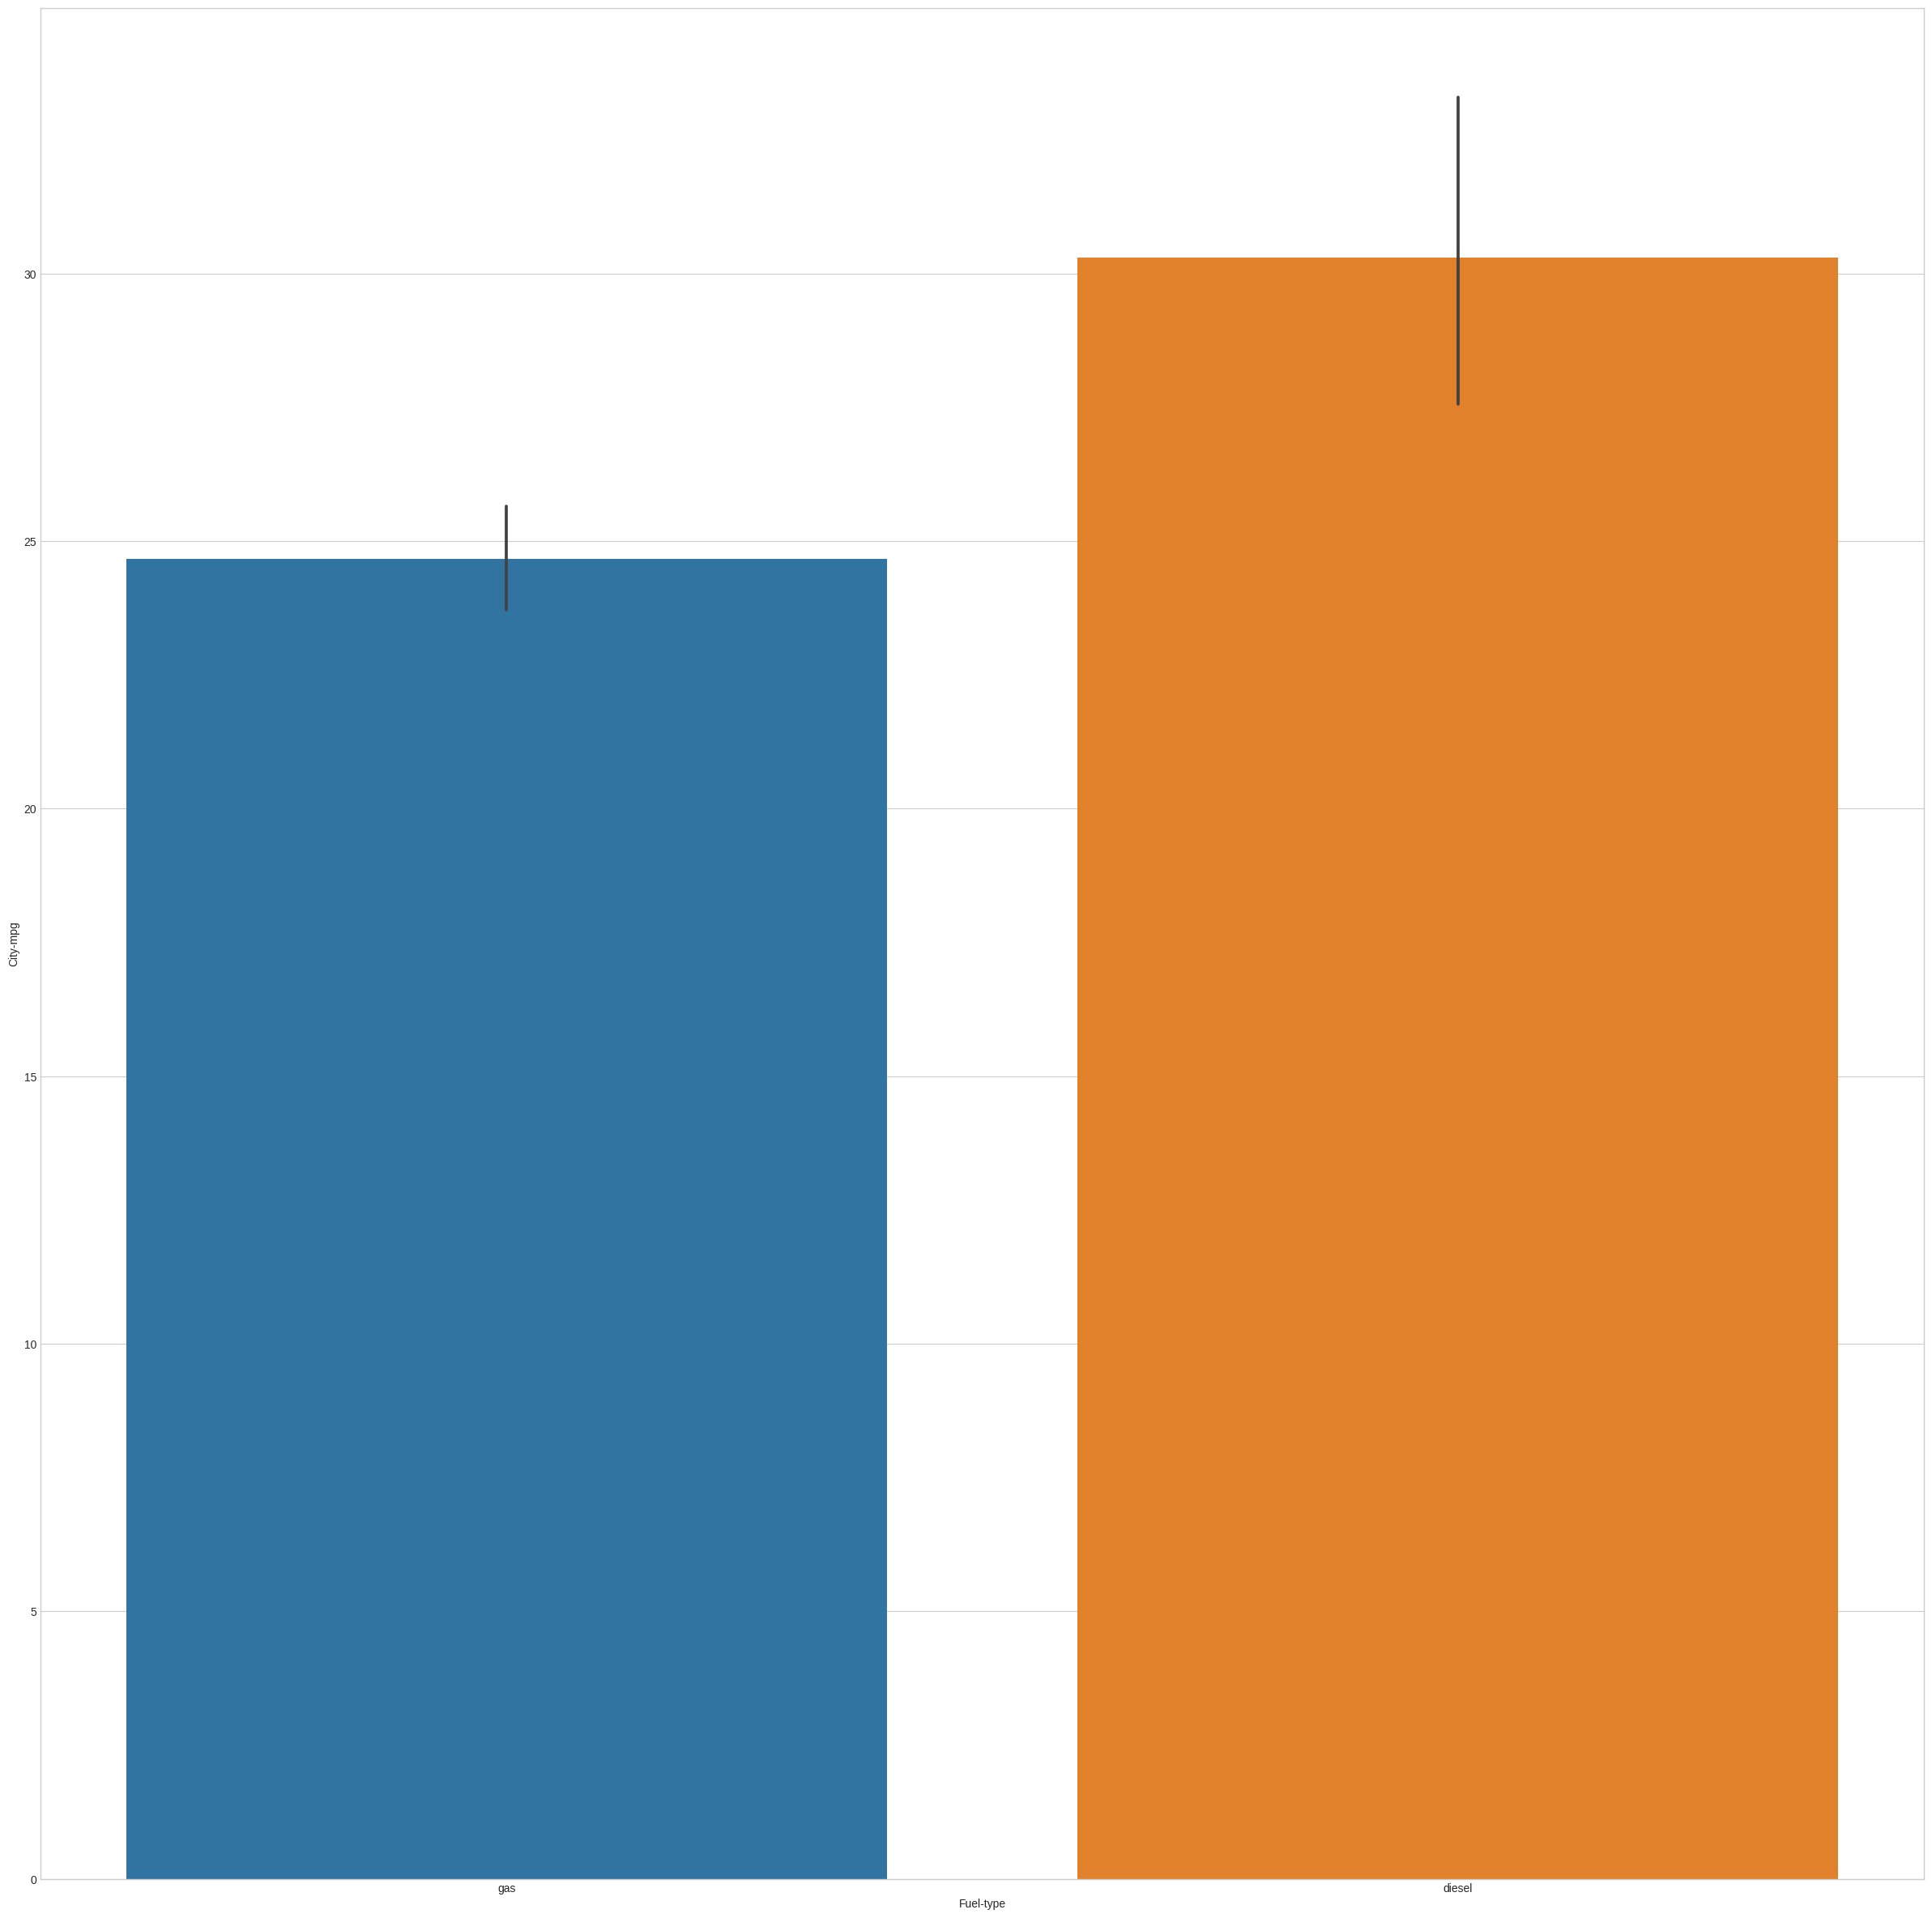

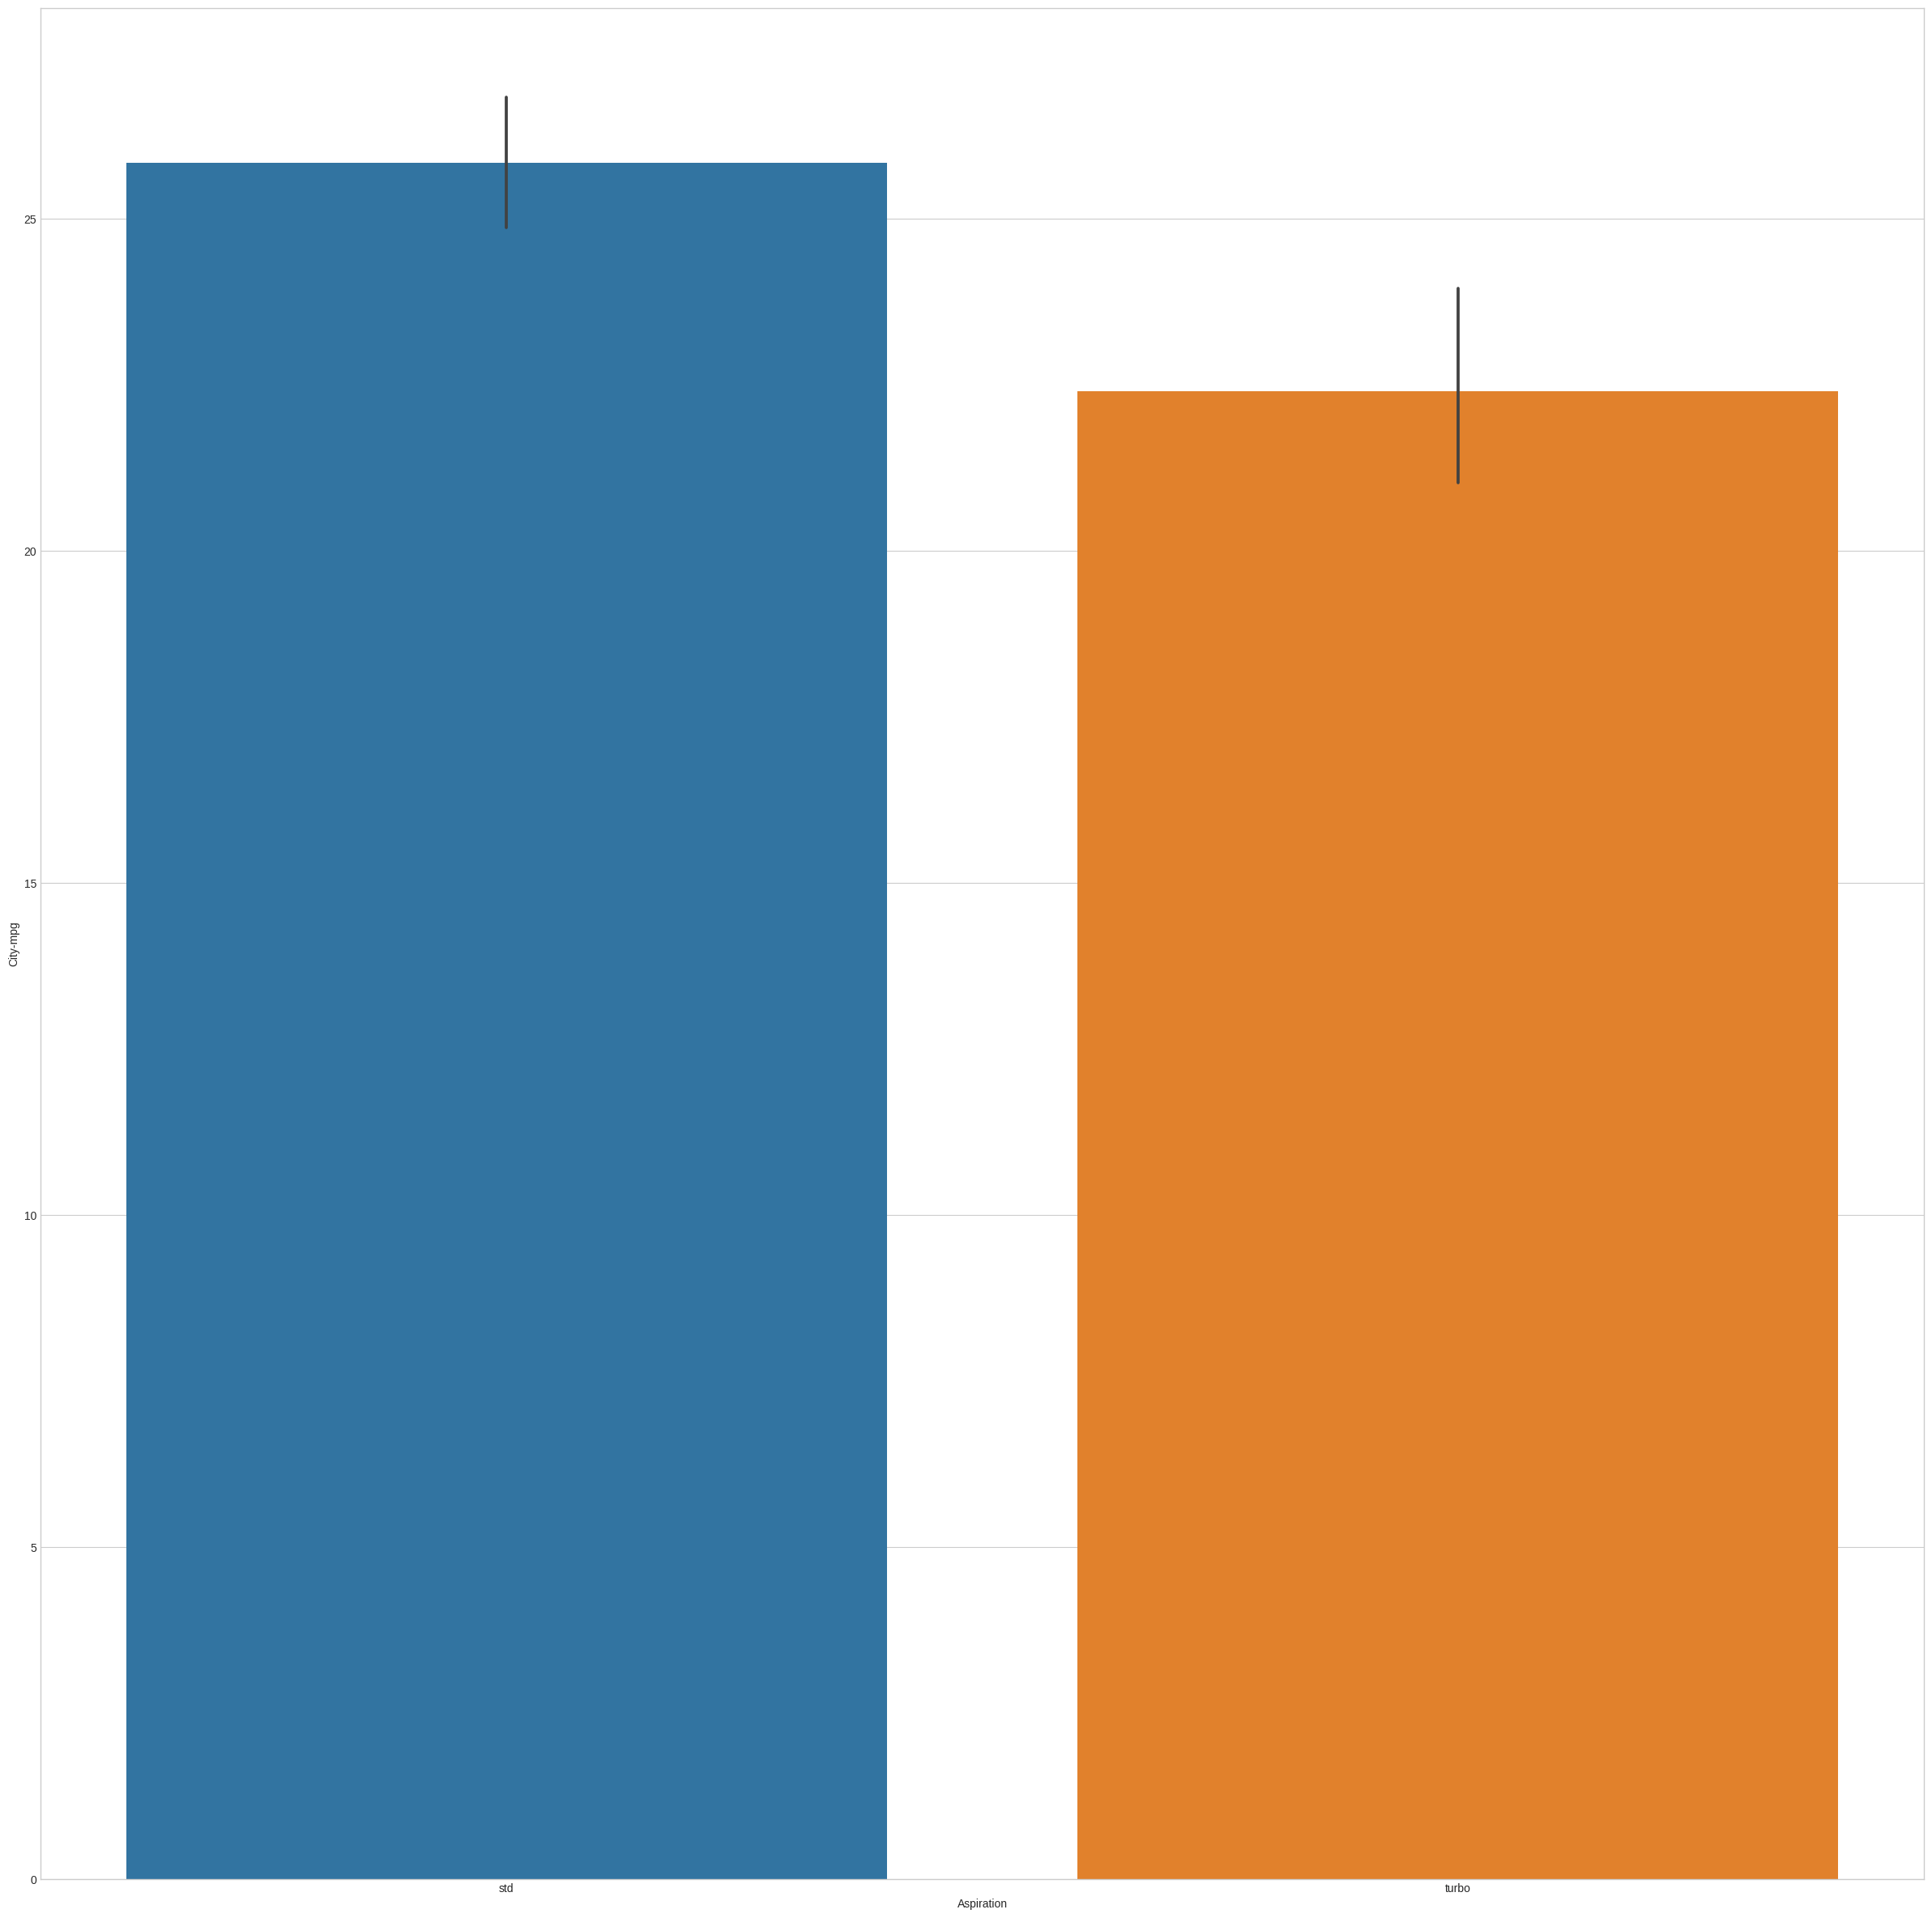

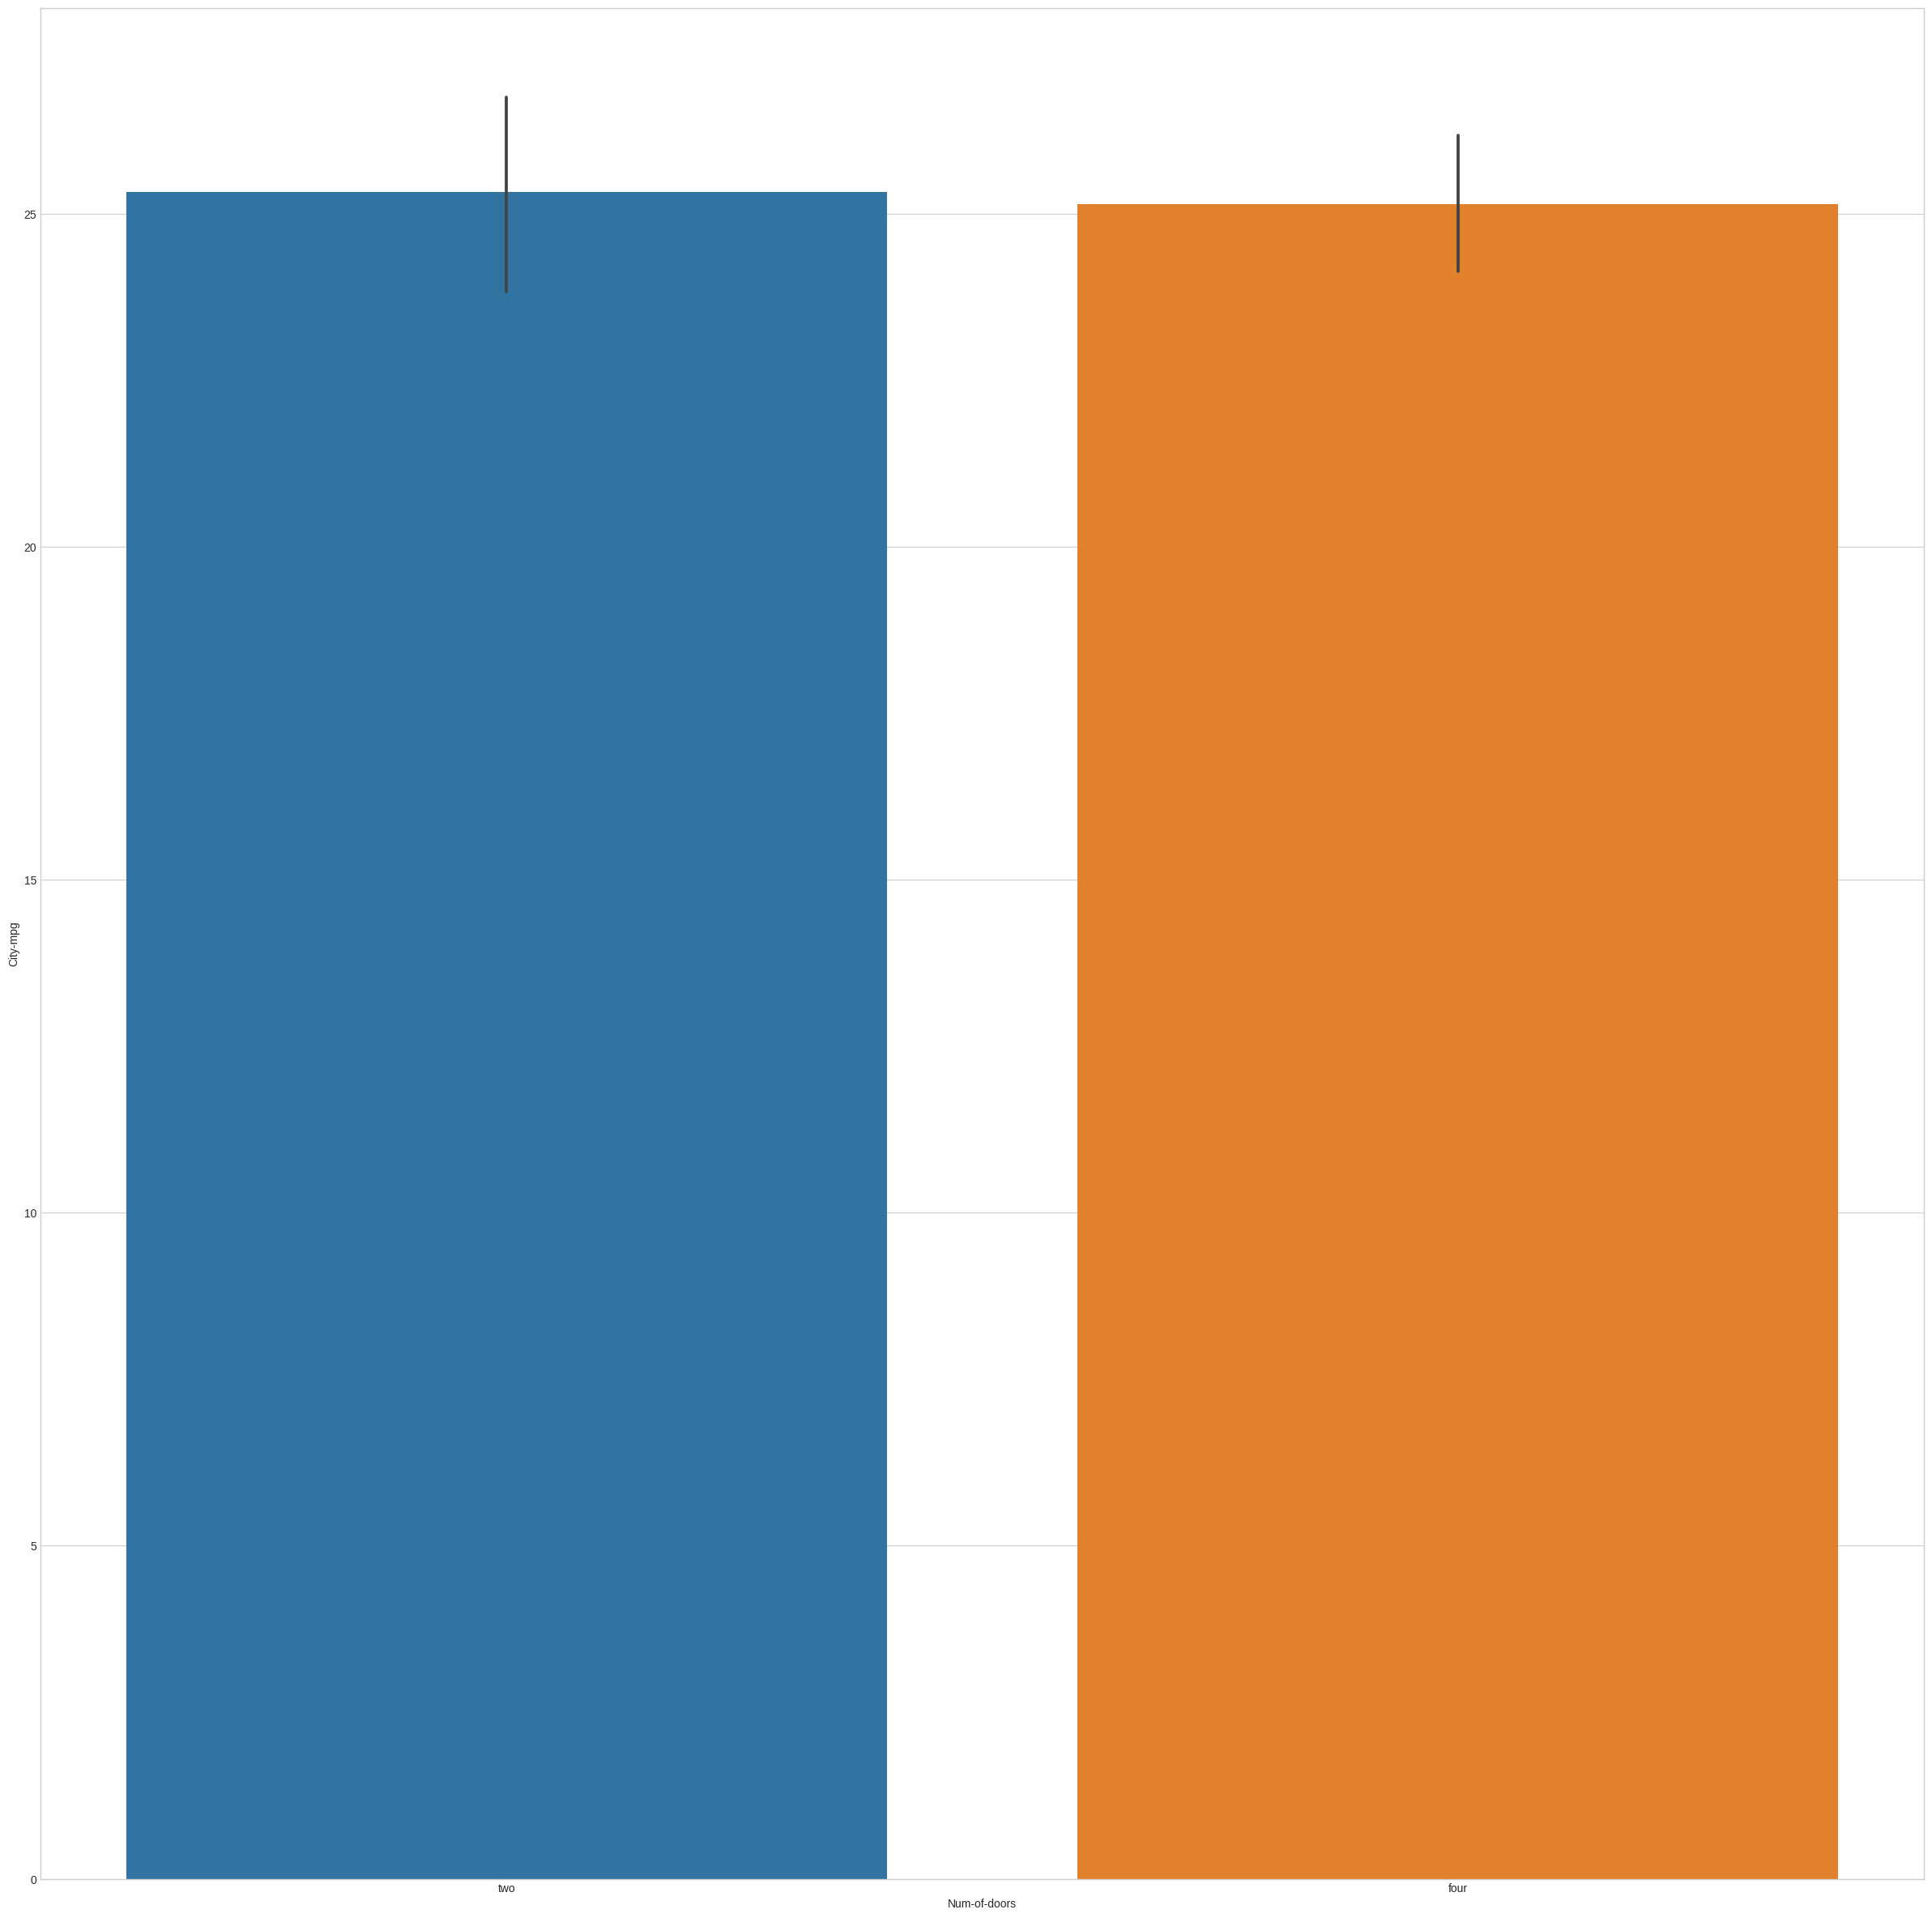

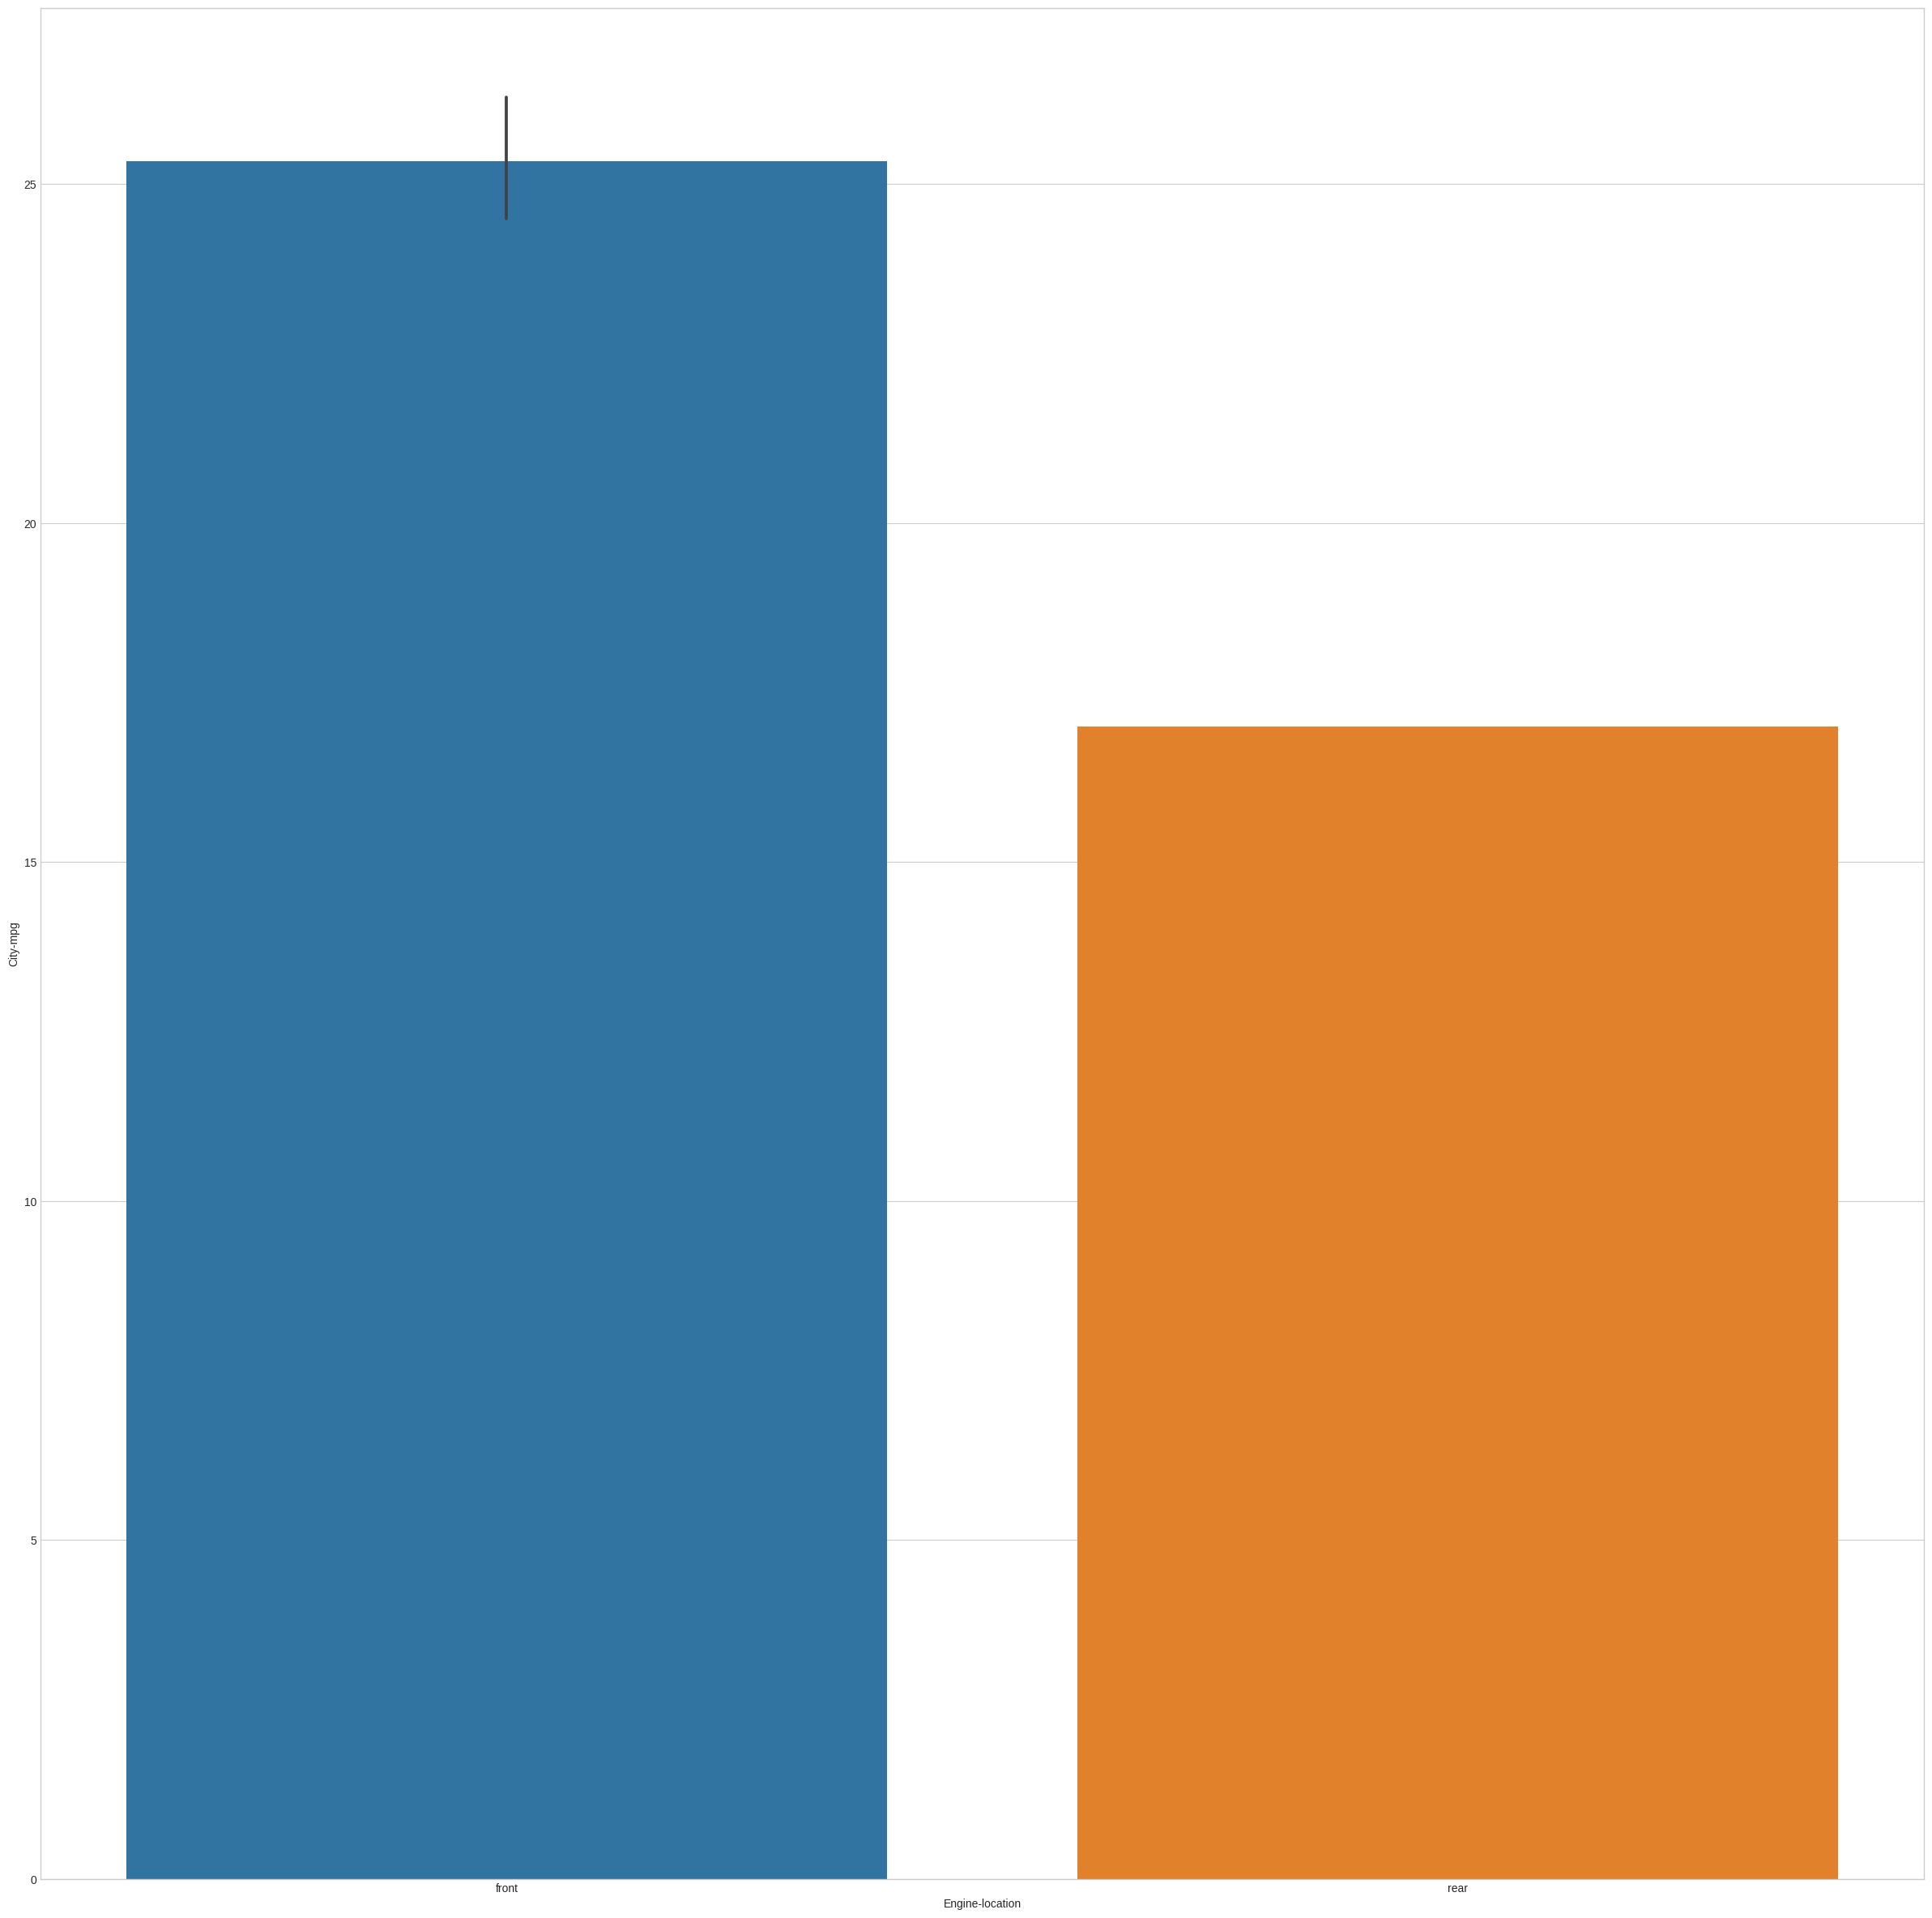

In [ ]:
for i in new_categorical_columns:
    plt.figure()
    sns.barplot(x=i, y='City-mpg', data=df07)
    plt.plot()

Since 2 doors and 4 doors have the same city-mpg value, the num-doors variable doesn't affect the city-mpg variable.

In [ ]:
cat_columns = ['Symboling', 'Make', 'Fuel-type', 'Aspiration', 'Num-of-doors', 'Body-style', 'Drive-wheels', 'Engine-location', 'Engine-type', 'Num-of-cylinders', 'Fuel-system']
df_processed =pd.get_dummies(df07, prefix_sep=' ', columns=cat_columns, drop_first=True)
df_processed.head()

,Normalized-losses,Wheel-base,Length,Width,Height,Curb-weight,Engine-size,Bore,Stroke,Compression-ratio,...,Num-of-cylinders 4.0,Num-of-cylinders 5.0,Num-of-cylinders 6.0,Fuel-system 1.0,Fuel-system 2.0,Fuel-system 3.0,Fuel-system 4.0,Fuel-system 5.0,Fuel-system 6.0,Fuel-system 7.0
0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_processed.shape

(205, 70)

In [ ]:
df_processed.columns

Index(['Normalized-losses', 'Wheel-base', 'Length', 'Width', 'Height',
       'Curb-weight', 'Engine-size', 'Bore', 'Stroke', 'Compression-ratio',
       'Horsepower', 'Peak-rpm', 'City-mpg', 'Highway-mpg', 'Price',
       'Symboling -2', 'Symboling 0', 'Symboling 1', 'Symboling 2',
       'Symboling 3', 'Make 1.0', 'Make 2.0', 'Make 3.0', 'Make 4.0',
       'Make 5.0', 'Make 6.0', 'Make 7.0', 'Make 8.0', 'Make 9.0', 'Make 10.0',
       'Make 11.0', 'Make 12.0', 'Make 13.0', 'Make 14.0', 'Make 15.0',
       'Make 16.0', 'Make 17.0', 'Make 18.0', 'Make 19.0', 'Make 20.0',
       'Make 21.0', 'Fuel-type gas', 'Aspiration turbo', 'Num-of-doors two',
       'Body-style 1.0', 'Body-style 2.0', 'Body-style 3.0', 'Body-style 4.0',
       'Drive-wheels 1.0', 'Drive-wheels 2.0', 'Engine-location rear',
       'Engine-type 1.0', 'Engine-type 2.0', 'Engine-type 3.0',
       'Engine-type 4.0', 'Engine-type 5.0', 'Engine-type 6.0',
       'Num-of-cylinders 1.0', 'Num-of-cylinders 2.0', 'Num-of-cyli

In [ ]:
X = df_processed.drop(['City-mpg'], axis=1)
y = df_processed[['City-mpg']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=12)
X_train.head()

,Normalized-losses,Wheel-base,Length,Width,Height,Curb-weight,Engine-size,Bore,Stroke,Compression-ratio,...,Num-of-cylinders 4.0,Num-of-cylinders 5.0,Num-of-cylinders 6.0,Fuel-system 1.0,Fuel-system 2.0,Fuel-system 3.0,Fuel-system 4.0,Fuel-system 5.0,Fuel-system 6.0,Fuel-system 7.0
204,95.0,109.1,188.8,68.9,55.5,3062.0,141.0,3.78,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0
137,104.0,99.1,186.6,66.5,56.1,2847.0,121.0,3.54,3.07,9.0,...,0,0,0,0,0,0,0,1,0,0
45,122.0,94.5,155.9,63.6,52.0,1909.0,90.0,3.03,3.11,9.6,...,0,0,0,1,0,0,0,0,0,0
187,94.0,97.3,171.7,65.5,55.7,2319.0,97.0,3.01,3.40,23.0,...,0,0,0,0,0,1,0,0,0,0
33,101.0,93.7,150.0,64.0,52.6,1940.0,92.0,2.91,3.41,9.2,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print('Training dataset shape: ', X_train.shape, y_train.shape)
print('Testing dataset shape: ', X_test.shape, y_test.shape)

Training dataset shape:  (143, 69) (143, 1)
Testing dataset shape:  (62, 69) (62, 1)


In [ ]:
new_numerical_columns02 = ['Normalized-losses', 'Wheel-base', 'Length', 'Width', 'Height',
       'Curb-weight', 'Engine-size', 'Bore', 'Stroke', 'Compression-ratio',
       'Horsepower', 'Peak-rpm', 'Highway-mpg', 'Price']

pd.options.mode.chained_assignment = None

sc = StandardScaler()

for i in new_numerical_columns02[:-1]:
    X_train[i] = X_train[i].astype('float64')
    X_train[i] = sc.fit_transform(X_train[i].values.reshape(-1,1))

X_train.head()

,Normalized-losses,Wheel-base,Length,Width,Height,Curb-weight,Engine-size,Bore,Stroke,Compression-ratio,...,Num-of-cylinders 4.0,Num-of-cylinders 5.0,Num-of-cylinders 6.0,Fuel-system 1.0,Fuel-system 2.0,Fuel-system 3.0,Fuel-system 4.0,Fuel-system 5.0,Fuel-system 6.0,Fuel-system 7.0
204,-0.858392,1.594969,1.163497,1.379929,0.683298,0.878505,0.276383,1.614745,-0.351251,-0.198291,...,0,0,0,0,0,0,0,1,0,0
137,-0.568507,0.006775,0.987729,0.254741,0.924165,0.483783,-0.175048,0.743539,-0.618670,-0.317523,...,0,0,0,0,0,0,0,1,0,0
45,0.011262,-0.723795,-1.465029,-1.104861,-0.721758,-1.238306,-0.874767,-1.107773,-0.484960,-0.174445,...,0,0,0,1,0,0,0,0,0,0
187,-0.890601,-0.279100,-0.202697,-0.214087,0.763587,-0.485580,-0.716766,-1.180374,0.484433,3.020958,...,0,0,0,0,0,1,0,0,0,0
33,-0.665136,-0.850850,-1.936406,-0.917330,-0.480891,-1.181393,-0.829624,-1.543376,0.517861,-0.269830,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
corr_result = X_train.corr()
corr_result = corr_result.stack()
corr_result[(corr_result != 1) & ((corr_result > .8)|(corr_result < -.8))]

Wheel-base            Length                  0.878198
                      Width                   0.815533
Length                Wheel-base              0.878198
                      Width                   0.866089
                      Curb-weight             0.883053
Width                 Wheel-base              0.815533
                      Length                  0.866089
                      Curb-weight             0.900498
Curb-weight           Length                  0.883053
                      Width                   0.900498
                      Engine-size             0.849454
                      Highway-mpg            -0.808283
                      Price                   0.828291
Engine-size           Curb-weight             0.849454
                      Horsepower              0.818744
                      Price                   0.885000
Compression-ratio     Fuel-type gas          -0.984981
                      Fuel-system 3.0         0.984981
Horsepower